In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_final_multi.csv')
df

,Bacteria,Year,Code_C,Country,Region,Aminoglycosides,Carbapenems,Ceftazidime,Fluoroquinolones,Piperacilina_taz,pca_1,multi_R_perc,per_cap_US.,GDP_total,GDP_._health,Out_pocket_exp,HDR,ctrl_corrup,GOV_effect,rule_law
0,Pseudomonas aeruginosa,2005,AT,Austria,Western,0.064935,0.103896,0.065789,0.142857,0.129870,-1.150640,0.064935,3709.0,38403.133880,9.63,19.183260,0.855,1.922060,1.684595,1.859191
1,Pseudomonas aeruginosa,2005,BG,Bulgaria,Eastern,0.529412,0.375000,0.454545,0.470588,0.500000,4.765291,0.470588,267.7,3899.907638,6.94,38.867414,0.750,0.057295,0.181857,-0.095587
2,Pseudomonas aeruginosa,2005,CY,Cyprus,Southern,0.108108,0.111111,0.243243,0.270270,0.270270,0.527297,0.189189,1366.0,24959.259170,5.44,49.832198,0.830,0.906869,1.157761,0.887087
3,Pseudomonas aeruginosa,2005,CZ,Czechia,Eastern,0.278261,0.311284,0.396887,0.453125,0.206226,2.594104,0.307393,852.7,13346.176390,6.38,11.092852,0.835,0.487308,0.925237,0.867528
4,Pseudomonas aeruginosa,2005,DE,Germany,Western,0.119658,0.247863,0.106195,0.226087,0.181034,0.060663,0.162393,3547.0,34507.368810,10.23,14.089450,0.900,1.885013,1.505681,1.663715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Pseudomonas aeruginosa,2018,PT,Portugal,Southern,0.119026,0.157040,0.186239,0.237319,0.218978,0.221695,0.152527,1908.0,23461.571860,8.97,27.532080,0.850,0.849960,1.208909,1.140163
397,Pseudomonas aeruginosa,2018,RO,Romania,Eastern,0.506849,0.551282,0.467105,0.522581,0.492754,5.471816,0.493506,555.1,12408.596490,5.16,20.488046,0.816,-0.121651,-0.253442,0.325064
398,Pseudomonas aeruginosa,2018,SE,Sweden,Northern,0.009732,0.043689,0.060680,0.071078,0.077859,-1.918051,0.019417,5905.0,54589.060390,11.02,15.032604,0.937,2.139882,1.830975,1.894910
399,Pseudomonas aeruginosa,2018,SK,Slovakia,Eastern,0.374016,0.439516,0.320675,0.523810,0.368644,3.760121,0.358871,1186.0,19428.116210,6.74,18.713185,0.857,0.362984,0.707462,0.528572


In [4]:
X = df.iloc[:,12:20]  # features
X

,per_cap_US.,GDP_total,GDP_._health,Out_pocket_exp,HDR,ctrl_corrup,GOV_effect,rule_law
0,3709.0,38403.133880,9.63,19.183260,0.855,1.922060,1.684595,1.859191
1,267.7,3899.907638,6.94,38.867414,0.750,0.057295,0.181857,-0.095587
2,1366.0,24959.259170,5.44,49.832198,0.830,0.906869,1.157761,0.887087
3,852.7,13346.176390,6.38,11.092852,0.835,0.487308,0.925237,0.867528
4,3547.0,34507.368810,10.23,14.089450,0.900,1.885013,1.505681,1.663715
...,...,...,...,...,...,...,...,...
396,1908.0,23461.571860,8.97,27.532080,0.850,0.849960,1.208909,1.140163
397,555.1,12408.596490,5.16,20.488046,0.816,-0.121651,-0.253442,0.325064
398,5905.0,54589.060390,11.02,15.032604,0.937,2.139882,1.830975,1.894910
399,1186.0,19428.116210,6.74,18.713185,0.857,0.362984,0.707462,0.528572


---
### Interpretación de los Coeficientes en un RL

Los valores de los coeficientes de un modelo de RL en conjunto con el uso de pruebas de hipótesis pueden ser utilizados para indicar la **naturaleza entre las variables independientes y la variable dependiente** y si estas relaciones son **estadísticamente significativas**.

Respecto a **los coeficientes** el **signo** y la **magnitud** indican diferentes cosas:

- ***Signo***: el sentido de la correlación entre cada variable independiente y la variable dependiente. Un coeficiente *positivo* indica que a medida que aumenta el valor de $x_i$, la media de $y$ también tiende a aumentar; un coeficiente *negativo* sugiere que a medida que aumenta el valor de $x_i$, el valor de $y$ tiende a disminuir.

- ***Magnitud***: indica cuánto cambia la media de $y$ dado un cambio de una unidad en la variable independiente $x_i$ mientras el resto de las variables se mantienen constantes. Esta propiedad de mantener constantes las otras variables es crucial ya que permite evaluar el efecto de cada variable de forma aislada sobre $y$.

Por otro lado existen dos pruebas de hipótesis utilizadas en RL. Por un lado, la **prueba F de Fisher** es utilizada para verificar la significancia de las variables independientes en una RL evaluandolas simultáneamente. Por el otro lado, la **prueba T** es utilizada para verificar la significancia una variable a la vez.

La prueba F de Fisher tiene las siguientes dos hipótesis:

- $H_0$: el modelo con solo el intercepto tiene el mismo ajuste a los datos que el modelo propuesto con todas las variables independientes.

- $H_A$: el modelo propuesto ajusta mejor que el modelo con solo el intercepto.

Si el p-value resultante de la prueba F es menor o igual que el nivel de significancia (e.g. $\textit{p}=0.005$), podemos aceptar $H_A$.

La prueba T es similar pero evaluando una variable independiente a la vez.

Analicemos el ejemplo utilizando ``statsmodels.api``

---
## Visualizando la relación  variables usando un Mapa de Calor

La **correlación** es cualquier relación estadística, ya sea causal o no, entre dos o más variables aleatorias que mide como se relacionan unas con las otras. En el sentido más amplio se reriere a cualquier asociación estadística, aunque comúnmente nos refierimos **al grado en que un par de variables están relacionadas linealmente** ($r\text{ o } \rho$).

Las correlaciones son útiles porque pueden indicar una **relación predictiva** que puede explotarse en la práctica. Usando este tipo de funciones podemos formar una **heuristica** para seleccionar las variables que utilizaremos en nuestra RL. Por ejemplo, una compañía eléctrica puede producir menos energía en un día templado en función de la correlación entre la demanda de electricidad y el clima.

Las 2 funciones de correlación más utilizadas son:

- **Coeficiente de Pearson**. Intenta establecer una línea con el mejor ajuste para los datos de dos variables a traves de los valores esperados. El valor del coeficiente resultante indica qué tan lejos está el conjunto de datos real de los valores esperados.
\begin{align}
\rho_{X,Y} &= corr(X,Y)= \frac{cov(X,Y)}{\sigma_X\cdot\sigma_Y}=\frac{\text{E}[(X - \mu_X) \cdot (Y - \mu_y)]}{\sigma_X\cdot\sigma_Y} \\
corr(X,Y) &\in [-1,1]
\end{align}


<img src="https://docs.google.com/uc?export=download&id=111DG1bi5ewOtSIuOlB0pRcFj21yeFG5x" width="800" align="middle">


- **Coeficiente de Spearman**. Es una medida no-paramétrica de correlación de rango (dependencia estadística entre los rangos de dos variables). Evalúa qué tan bien la relación entre dos variables se puede describir utilizando una función monotónica, sea creciente o decreciente (indistintamente si esta función es lineal o no). Los valores que toma este coeficiente se interpretan de forma similar al coeficiente de Pearson.

\begin{align}
\rho_{rg_X,rg_Y} &= r_s(rg_X,rg_Y)=\frac{cov(rg_X,rg_Y)}{\sigma_{rg_X}\cdot\sigma_{rg_Y}}, \\
r_s &\in [-1,1]
\end{align}

tal que $rg_{X_i},\ rg_{Y_i}$ representan los valores de las variables $X_i$ y $Y_i$, respectivamente, en rangos.

<img src="https://docs.google.com/uc?export=download&id=1WXANQb-rIdPO0bISEOCsBGf1OLfIZRvt" width="800" align="middle">




#### Ejemplo:

Usemos estas 2 medidas construiremos una matriz de correlaciones.
Para esto necesitaremos las librerias Seaborn, Matplotlib, Sklearn, Pandas y Numpy.

1. Analizaremos cuales son las correlaciones observadas y sus signos.
2. Utilizaremos un umbral de correlación para determinar las variables independientes que entrarán en nuestro modelo final.

Usando la matriz de correlación determinaremos que variables usaremos para predecir ``PE``. En este caso, requeriremos que la relación sea $|r|> 0.5$

/tmp/ipykernel_16264/1364703775.py:44: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Train_ndarray = np.hstack([X_train_poly_df, y[:, np.newaxis]])


<AxesSubplot:>

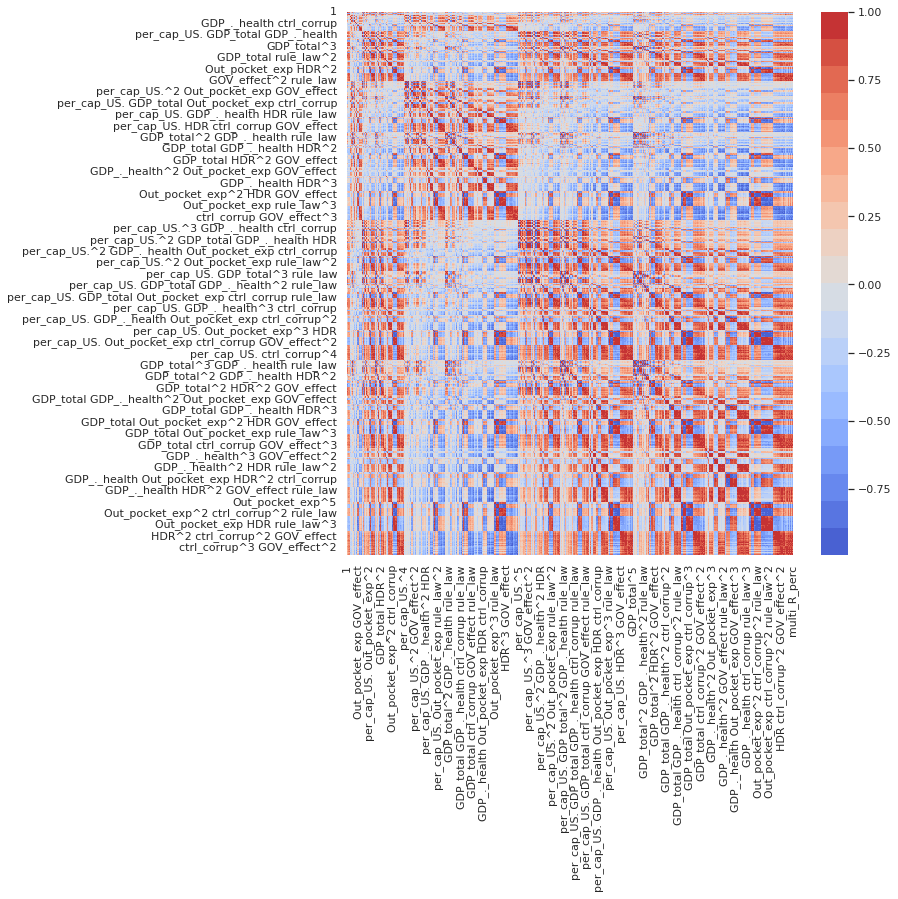

In [139]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

poly_grade = 5

std_scl = StandardScaler()
poly = PolynomialFeatures(poly_grade)

X = df.iloc[:,12:20]
y = df['multi_R_perc']

# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.2, 
#                                                     random_state=1)

#Standardize X_train into X_train_scl
X_train_scl = std_scl.fit_transform(X) #Standardize and assign it to a variable

#Construct a DataFrame with column names
X_train_scl_df = pd.DataFrame(X_train_scl, 
                              index=X.index, 
                              columns=X.columns)

#Create PolynomialFeatures -> get their names
p_model     = poly.fit(X_train_scl_df)
poly_names  = p_model.get_feature_names(X_train_scl_df.columns)

#Transform X_train_scl into X_train_poly where polynomial features are stored
X_train_poly    = poly.fit_transform(X_train_scl_df)
X_train_poly_df = pd.DataFrame(X_train_poly, 
                              index=X.index, 
                              columns= poly_names)

#Create the full Train_df which is the matrix composed by Xy
all_names = np.concatenate((X_train_poly_df.columns, 'multi_R_perc'), axis=None)
Train_ndarray = np.hstack([X_train_poly_df, y[:, np.newaxis]])

Train_df = pd.DataFrame(Train_ndarray, 
                              index=X.index, 
                              columns = all_names)

# Compute the correlation matrix
corr_mtx = Train_df.corr()
# corr_mtx = Train_df.corr('spearman')

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_mtx, dtype=np.bool))

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_mtx, 
            # mask=mask, 
            cmap=sns.color_palette("coolwarm", 20))
# sns.heatmap(corr_mtx,ax=ax, cmap ="YlGnBu", linewidths = 0.1,)


In [140]:
#corr_mtx

In [141]:
print(X.shape)
print(y.shape)
print(X_train_poly.shape)

(401, 8)
(401,)
(401, 1287)


In [142]:
Train_df.shape

(401, 1288)

In [143]:
Train_df.head()

,1,per_cap_US.,GDP_total,GDP_._health,Out_pocket_exp,HDR,ctrl_corrup,GOV_effect,rule_law,per_cap_US.^2,...,ctrl_corrup GOV_effect^2 rule_law^2,ctrl_corrup GOV_effect rule_law^3,ctrl_corrup rule_law^4,GOV_effect^5,GOV_effect^4 rule_law,GOV_effect^3 rule_law^2,GOV_effect^2 rule_law^3,GOV_effect rule_law^4,rule_law^5,multi_R_perc
0,1.0,0.319894,0.125417,0.832386,-0.218324,-0.395114,1.016323,0.884154,1.085846,0.102332,...,0.936751,1.150440,1.412876,5.403073e-01,6.635608e-01,8.149306e-01,1.000830,1.229137,1.509525,0.064935
1,1.0,-1.333407,-1.344347,-0.739957,1.744645,-2.866707,-1.290344,-1.663321,-2.078085,1.777975,...,-15.416438,-19.260664,-24.063482,-1.273151e+01,-1.590623e+01,-1.987259e+01,-24.827992,-31.019072,-38.753954,0.470588
2,1.0,-0.805752,-0.447263,-1.616728,2.838090,-0.983589,-0.239443,-0.008946,-0.487565,0.649236,...,-0.000005,-0.000248,-0.013531,-5.728614e-11,-3.122281e-09,-1.701744e-07,-0.000009,-0.000506,-0.027553,0.189189
3,1.0,-1.052356,-0.941956,-1.067285,-1.025126,-0.865894,-0.758430,-0.403127,-0.519223,1.107453,...,-0.033228,-0.042798,-0.055123,-1.064651e-02,-1.371260e-02,-1.766169e-02,-0.022748,-0.029299,-0.037737,0.307393
4,1.0,0.242064,-0.040534,1.183095,-0.726295,0.664140,0.970496,0.580856,0.769455,0.058595,...,0.193864,0.256810,0.340195,6.612134e-02,8.759045e-02,1.160304e-01,0.153705,0.203611,0.269723,0.162393


In [157]:
delta = 0.7
main_variables=corr_mtx.iloc[1:-1,-1].abs() > delta
#main_variables

In [158]:
main_variables[main_variables].index

Index(['ctrl_corrup', 'GOV_effect', 'rule_law', 'ctrl_corrup^3',
       'ctrl_corrup^2 GOV_effect', 'ctrl_corrup^2 rule_law'],
      dtype='object')

In [159]:
print(main_variables[main_variables].index.shape)
print(len(main_variables[main_variables].index))

(6,)
6


In [160]:
# Following we create a dataframe with the selected features

In [161]:
main_vars=main_variables.to_frame()

In [162]:
# main_vars contains all the variables not yet filtered
#main_vars

In [163]:
filtered_vars=list(main_vars[main_variables].index)

In [164]:
len(filtered_vars)

6

In [165]:
X_R = Train_df[filtered_vars]
X_R

,ctrl_corrup,GOV_effect,rule_law,ctrl_corrup^3,ctrl_corrup^2 GOV_effect,ctrl_corrup^2 rule_law
0,1.016323,0.884154,1.085846,1.049772,0.913254,1.121583
1,-1.290344,-1.663321,-2.078085,-2.148409,-2.769410,-3.459987
2,-0.239443,-0.008946,-0.487565,-0.013728,-0.000513,-0.027954
3,-0.758430,-0.403127,-0.519223,-0.436261,-0.231885,-0.298665
4,0.970496,0.580856,0.769455,0.914074,0.547087,0.724722
...,...,...,...,...,...,...
396,-0.309837,0.077761,-0.077946,-0.029744,0.007465,-0.007483
397,-1.511697,-2.401250,-1.397234,-3.454569,-5.487400,-3.192997
398,1.285763,1.132302,1.143659,2.125606,1.871906,1.890681
399,-0.912215,-0.772304,-1.067844,-0.759086,-0.642662,-0.888590


In [166]:
# Just execute once, otherwise filtered_vars will contain the variable 'Intercept' twice
filtered_vars.insert(0,'Intercept')
print(type(filtered_vars))
print(len(filtered_vars))

<class 'list'>
7


In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm

std_scl = StandardScaler()

y = df['multi_R_perc']
#y = ccpp_df[[4]]
#df.columns[2]
X_train, X_test, y_train, y_test = train_test_split(X_R, y, 
                                                    test_size=0.2, 
                                                    random_state=100)

X_train_scl = std_scl.fit_transform(X_train) #Standardize and assign it to a variable
X_train_sm = sm.add_constant(X_train_scl)
model_sm = sm.OLS(y_train, X_train_sm)

results = model_sm.fit()
results.params

print(results.summary(filtered_vars))

                                                                                  OLS Regression Results                                                                                 
Dep. Variable:     ['Intercept', 'ctrl_corrup', 'GOV_effect', 'rule_law', 'ctrl_corrup^3', 'ctrl_corrup^2 GOV_effect', 'ctrl_corrup^2 rule_law']   R-squared:                       0.627
Model:                                                                                                                                       OLS   Adj. R-squared:                  0.620
Method:                                                                                                                            Least Squares   F-statistic:                     87.70
Date:                                                                                                                           Fri, 24 Dec 2021   Prob (F-statistic):           4.61e-64
Time:                                                                 

R2:  0.49608870530707616
RMSE:  0.08630539107540908


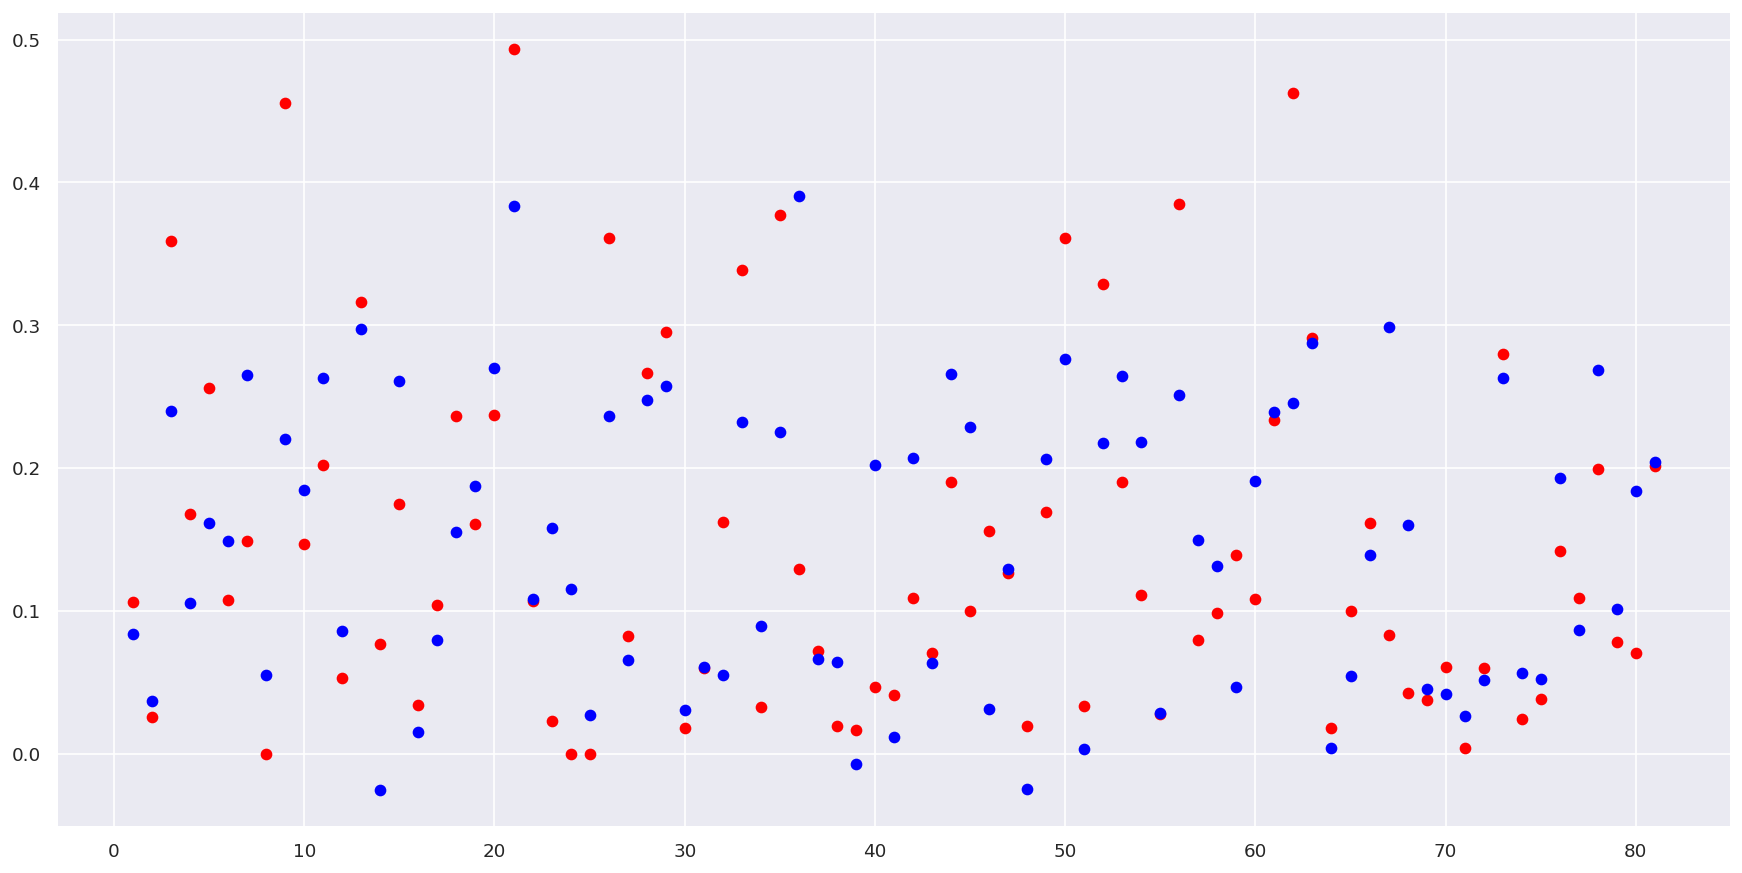

In [168]:
# R^2 on test data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import numpy as np

#here the degree of the polynomialFeatures must be one, 
#since the filtered variables have been selected already
model_pl = make_pipeline(StandardScaler(),
                         PolynomialFeatures(1),
                          LinearRegression())

#X = ccpp_df.iloc[:,15:24]
#y = ccpp_df['multi_R_perc']

X_train, X_test, y_train, y_test = train_test_split(X_R, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

model_pl.fit(X_train, y_train)

# print(model_pl.steps)
# print(model_pl.named_steps['linearregression'].coef_)
# print(model_pl.named_steps['linearregression'].intercept_)

y_hat = model_pl.predict(X_test)
# y_hat = model_pl.predict(X_train)

x_plt = np.linspace(1, y_hat.shape[0], y_hat.shape[0])
#fig, ax= plt.subplots(figsize=(18, 9),dpi=120)
plt.figure(figsize=(18, 9), dpi=120)
plt.scatter(x_plt, y_test, color = 'red')
plt.scatter(x_plt, y_hat, color = 'blue')

print('R2: ',r2_score(y_test,y_hat))
print('RMSE: ',mean_squared_error(y_test,y_hat, squared=False))

In [20]:
# threshold = 0.5
# main_variables=corr_mtx.iloc[1:-1,-1].abs() > threshold
# main_vars=main_variables.to_frame()
# filter_vars=list(main_vars[main_variables].index)
# XR = Train_df[filter_vars]

--- 
## Prediccion:

Predecir ``X_test`` con las variables seleccionadas de acuerdo al umbral especificado.

Medir el error utilizando las métricas de error $R^2$ y MSE. Imprima ambos.



---
# 2.4. Evaluación del Error: $R^2$ y Error Cuadrático Promedio (MSE).

- **Coeficiente de Determinación** ($R^2$ or $r^2$): Es la proporción de la varianza en la variable dependiente ($y$) que es predecible/que se puede explicar a partir de las variables independientes ($X$). 

  Hay varias definiciones del coeficiente de determinación. En el caso RLS, $r^2$ es simplemente el cuadrado del coeficiente de correlación i.e. $(\rho_{X,Y})^2$. En el caso de RLM se llama coeficiente de correlaciones multiples. En ambos casos su valor es $R^2\in[0,1]$.

  $$
  R^2 \equiv 1 - \frac{\sum_i e_i^2}{\sum_i (y_i-\bar{y})^2},
  $$

  tal que $e_i=y_i-\hat{y}_i$ son los residuos, y $\bar{y}$ es la media de la variable dependiente.

- **Error Cuadrático Promedio** (MSE): El error cuadrático promedio indica que tan cerca está una línea de regresión de un conjunto de puntos. Lo hace tomando los residuos y elevandolos al cuadrado. Se eleva al cuadrado por dos razones, por una parte es necesario para eliminar cualquier signo negativo, por la otra, le da más peso a las diferencias más grandes. En este sentido, MSE es una medida de la variabilidad explicada por el modelo. Esta medida toma valores entre $0\geq MSE \geq \infty$, de tal suerte que entre más pequeño sea el valor de MSE, mejor será el ajuste entre $y_i$ y $\hat{y}_i$.

  $$
  MSE(\mathbf{e})  = \frac{1}{N} \sum_{i=1}^N (e_i)^2.
  $$

  Sin embargo, para que el resultado de esta medida sea más intuitivo (el error en las mismas unidades que la variable dependiente), se utiliza la ráiz cuadrada de MSE (RMSE).

  $$
  RMSE(\mathbf{e})  = \sqrt{\frac{1}{N} \sum_{i=1}^N (e_i)^2},
  $$


### Ejercicio:

Deseamos construir una RL  con ``Scikit Learn`` para predecir la Energía Generada (PE) del ejemplo del generador de ciclo combinado. 

El modelo que deben utilizar debe incluir las siguientes caracteristicas:

1. $X$ tiene que estar estandarizado
2. Debemos usar funciones base para generar un polinómio de orden 5
3. El conjunto de datos se debe dividir en: ``X_train, y_train`` ($70 \%$) y ``X_test, y_test`` ($30 \%$).
4. Se debe predecir sobre ``X_test`` estandarizado.
5. Calcule el error de la RLM usando $R^2$ y RMSE. Imprima ambos.

Necesitaremos las librerias de ``sklearn``:

1. ``linear_model.LinearRegression``
2. ``preprocessing.StandardScaler, preprocessing.PolynomialFeatures``
3. ``model_selection.train_test_split``
4. ``metrics.r2_score, metrics.mean_squared_error``
5. ``pipeline import make_pipeline``

¿Qué podemos concluir de los resultados? 
¿Qué tan bueno es nuestro ajuste?

In [266]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd



### LOAD DATA 

df = pd.read_csv('data_final_multi.csv')

X = df.iloc[:,12:20]  # features
y = df['multi_R_perc']


### CREATE PIPELINES
no_poly = 5

std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()

lr_m  = LinearRegression()
knn_m = KNeighborsRegressor(n_neighbors=5)
dt_m  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)

polyFt_m = PolynomialFeatures(no_poly)

#--------
### SPLIT DATA INTO TRAIN AND TEST DATASETS

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

---
### Selección de Variables con ``SkLearn``

#### **1.1. Filtros**

- Previos al entrenamiento del modelo

##### **1.1.1. Filtro de poca Varianza**

- Se utiliza exclusivamente sobre la matriz de características ``X``.

En nuestro ejercicio de los regresores, este filtro eliminará las variables con varianza menor a 0.01

In [267]:
from sklearn.feature_selection import VarianceThreshold

delta = 0.05
 
X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)
 
sel = VarianceThreshold(threshold=( delta ))
X_train_sel = sel.fit_transform(X_train_tmp)
 
#Obtain a mask of True and False values: 
#true -> feat is selected
#false -> otherwise
ft_sel_msk = sel.get_support()
 
ft_names = polyFt_m.get_feature_names(X.columns)
ft_names = np.asarray(ft_names)
# print('Antes:', ft_names)
# print('Despues:', ft_names[ft_msk])
 
X_train_sel = pd.DataFrame(X_train_sel,
                   columns=ft_names[ft_sel_msk])

In [268]:
print(X_train_sel.shape[1])

77


In [269]:
model_pl = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         lr_m)

model_knn = make_pipeline(sclr_01,
                          polyFt_m,
                          sel,
                          knn_m)

model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         dt_m)

In [270]:
# model_pl = make_pipeline(std_sclr,
#                          polyFt_m,
#                          sel,
#                          lr_m)

# model_knn = make_pipeline(std_sclr,
#                           polyFt_m,
#                           sel,
#                           knn_m)

# model_dt = make_pipeline(std_sclr,
#                          polyFt_m,
#                          sel,
#                          dt_m)

In [271]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

#--------
### EVALUATE CV TRAINING ERROR

scoring = {'R2': make_scorer(r2_score), 
           'RMSE': make_scorer(mean_squared_error)}

lrm_scr = cross_validate(model_pl, X_train, y_train, 
                          scoring = scoring, cv=10)
knn_scr = cross_validate(model_knn, X_train, y_train, 
                          scoring = scoring, cv=10)
dt_scr = cross_validate(model_dt, X_train, y_train, 
                         scoring = scoring, cv=10)

print('TRAIN CV ERROR----')

print('LRM_R2: ', np.mean(lrm_scr.get('test_R2')))
print('KNN_R2: ', np.mean(knn_scr.get('test_R2')))
print('DT_R2: ', np.mean(dt_scr.get('test_R2')))
print()
print('LRM_RMSE: ', np.mean(lrm_scr.get('test_RMSE')))
print('KNN_RMSE: ', np.mean(knn_scr.get('test_RMSE')))
print('DT_RMSE: ', np.mean(dt_scr.get('test_RMSE')))

TRAIN CV ERROR----
LRM_R2:  0.27948931909769203
KNN_R2:  0.7358942732124588
DT_R2:  0.5597931015956162

LRM_RMSE:  0.009940355288625465
KNN_RMSE:  0.004004905920432492
DT_RMSE:  0.006283323785599428


In [272]:
model_pl.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_dt.fit(X_train, y_train);

# #--------
# ### PREDICT TEST DATA 

y_hat = model_pl.predict(X_test)
y_hatknn = model_knn.predict(X_test)
y_hatdt = model_dt.predict(X_test)

# #--------
# ### PRINT SCORES

print('TEST ERROR----')

print('LR R2: ',r2_score(y_test,y_hat))
print('KNN R2: ',r2_score(y_test,y_hatknn))
print('DT R2: ',r2_score(y_test,y_hatdt))
print()
print('LR RMSE: ',mean_squared_error(y_test,y_hat, squared=False))
print('KNN RMSE: ',mean_squared_error(y_test,y_hatknn, squared=False))
print('DT RMSE: ',mean_squared_error(y_test,y_hatdt, squared=False))

TEST ERROR----
LR R2:  0.5764654315150174
KNN R2:  0.7322867589715286
DT R2:  0.40679530773738226

LR RMSE:  0.07912346719901539
KNN RMSE:  0.06290654082001
DT RMSE:  0.09364037996275461


##### **1.1.2. Selección de las K mejores variables**

- Selecciona las mejores características basadas en pruebas estadísticas univariadas.
- Se utiliza exclusivamente sobre la matriz de características ``X``.
- Utiliza una función de ``scoring`` para determinar las K mejores variables

En nuestro ejercicio de los regresores, este filtro seleccionará las 50 mejores variables de acuerdo a la prueba F de Fisher.

In [273]:
import warnings
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
#f_regression F de Fisher and SelectKBest
warnings.filterwarnings("ignore")


### CREATE PIPELINES
no_poly = 3

std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()

lr_m  = LinearRegression()
knn_m = KNeighborsRegressor(n_neighbors=5)
dt_m  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=2)

polyFt_m = PolynomialFeatures(no_poly)





no_fts = 60

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

sel = SelectKBest(f_regression, k=no_fts)
# sel = SelectKBest(mutual_info_regression, k=no_fts)
X_train_sel = sel.fit_transform(X_train_tmp, y_train)

# f_res, pval = f_regression(X_train_tmp, y_train)
# print(pval<0.001)

#Obtain a mask of True and False values: 
#true -> feat is selected
#false -> otherwise
ft_sel_msk = sel.get_support()

ft_names = polyFt_m.get_feature_names(X.columns)
ft_names = np.asarray(ft_names)

X_train_sel = pd.DataFrame(X_train_sel,
                   columns=ft_names[ft_sel_msk])

In [274]:
print(X_train_sel.shape[1])

60


In [275]:
model_pl = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         lr_m)

model_knn = make_pipeline(sclr_01,
                          polyFt_m,
                          sel,
                          knn_m)

model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         dt_m)

In [276]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

#--------
### EVALUATE CV TRAINING ERROR

scoring = {'R2': make_scorer(r2_score), 
           'RMSE': make_scorer(mean_squared_error)}

lrm_scr = cross_validate(model_pl, X_train, y_train, 
                          scoring = scoring, cv=10)
knn_scr = cross_validate(model_knn, X_train, y_train, 
                          scoring = scoring, cv=10)
dt_scr = cross_validate(model_dt, X_train, y_train, 
                         scoring = scoring, cv=10)

print('TRAIN CV ERROR----')

print('LRM_R2: ', np.mean(lrm_scr.get('test_R2')))
print('KNN_R2: ', np.mean(knn_scr.get('test_R2')))
print('DT_R2: ', np.mean(dt_scr.get('test_R2')))
print()
print('LRM_RMSE: ', np.mean(lrm_scr.get('test_RMSE')))
print('KNN_RMSE: ', np.mean(knn_scr.get('test_RMSE')))
print('DT_RMSE: ', np.mean(dt_scr.get('test_RMSE')))

TRAIN CV ERROR----
LRM_R2:  0.5189370480658551
KNN_R2:  0.7122681667754234
DT_R2:  0.6080214282085175

LRM_RMSE:  0.007361032437809362
KNN_RMSE:  0.0044418049748640815
DT_RMSE:  0.005560617823119897


In [277]:
model_pl.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_dt.fit(X_train, y_train);

# #--------
# ### PREDICT TEST DATA 

y_hat = model_pl.predict(X_test)
y_hatknn = model_knn.predict(X_test)
y_hatdt = model_dt.predict(X_test)

# #--------
# ### PRINT SCORES

print('TEST ERROR----')

print('LR R2: ',r2_score(y_test,y_hat))
print('KNN R2: ',r2_score(y_test,y_hatknn))
print('DT R2: ',r2_score(y_test,y_hatdt))
print()
print('LR RMSE: ',mean_squared_error(y_test,y_hat, squared=False))
print('KNN RMSE: ',mean_squared_error(y_test,y_hatknn, squared=False))
print('DT RMSE: ',mean_squared_error(y_test,y_hatdt, squared=False))

TEST ERROR----
LR R2:  0.6539302527404323
KNN R2:  0.7492896713292474
DT R2:  0.547376328797842

LR RMSE:  0.071522501634289
KNN RMSE:  0.06087612379757976
DT RMSE:  0.08179551852205677


--- 
#### **1.2. Envoltorios**

- Utilizan la calidad del modelo para añadir o eliminar variables.

##### **1.2.1. Eliminación Recursiva de Variables**

- Utiliza un REGRESOR que asigne pesos a las variables independientes (e.g. los coeficientes de una LRM) ó
- Redución progresiva de las variables 
  $$
  crit:|X_{new}|>=K
  $$
- Su funcionamiento es en 2 pasos y se itera mientras $crit==T$:

  - Se entrena sobre todas las variables disponibles y se obtiene sus pesos (con del parámetro ``coef_``) o la importancia de sus variables (con el atributo ``feature_importances_``).
  - Se eliminan las $\gamma$ variables con menos peso/menor importancia
  $$
  |X_{old}|>|X_{new}|
  $$


In [4]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE

df = pd.read_csv('data_final_multi.csv')

### CREATE PIPELINES
no_poly = 5

std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()

polyFt_m = PolynomialFeatures(no_poly)

X = df.iloc[:,12:20]
y = df['multi_R_perc']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)


# Temporal models for RFE
lr_tmp  = LinearRegression()
knn_tmp = KNeighborsRegressor(n_neighbors=5)
dt_tmp  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)



FEATURES_SELECTED = 80


rfe_lr = RFE(estimator=lr_tmp, n_features_to_select=FEATURES_SELECTED, step=20)
# rfe_knn = RFE(estimator=knn_tmp, n_features_to_select=50, step=20)
rfe_dt = RFE(estimator=dt_tmp, n_features_to_select=FEATURES_SELECTED, step=20)

rfe_lr.fit(X_train_tmp, y_train)
# rfe_knn.fit(X_train_tmp, y_train)
rfe_dt.fit(X_train_tmp, y_train)

X_train_rfe_lr = rfe_lr.fit_transform(X_train_tmp, y_train)
X_train_rfe_dt = rfe_dt.fit_transform(X_train_tmp, y_train)

# #Obtain a mask of True and False values: 
# #true -> feat is selected
# #false -> otherwise
ft_rfe_lr_msk = rfe_lr.get_support()
ft_rfe_dt_msk = rfe_dt.get_support()

ft_names = polyFt_m.get_feature_names(X.columns)
ft_names = np.asarray(ft_names)

X_train_rfe_lr = pd.DataFrame(X_train_rfe_lr,
                   columns=ft_names[ft_rfe_lr_msk])

#print(X_train_rfe_lr)

X_train_rfe_dt = pd.DataFrame(X_train_rfe_dt,
                   columns=ft_names[ft_rfe_dt_msk])

#print(X_train_rfe_dt)

np.intersect1d(ft_names[ft_rfe_lr_msk],ft_names[ft_rfe_dt_msk]).shape

     DDD_sys_commun^2 per_cap_US.  DDD_sys_commun GDP_._health HDR  \
0                        0.000532                         0.000245   
1                        0.007846                         0.056870   
2                        0.004690                         0.083182   
3                        0.076531                         0.164113   
4                        0.050234                         0.065565   
..                            ...                              ...   
315                      0.072214                         0.260353   
316                      0.002001                         0.018539   
317                      0.101787                         0.314922   
318                      0.011640                         0.042273   
319                      0.020997                         0.083284   

     DDD_sys_commun GDP_._health ctrl_corrup  \
0                                   0.000168   
1                                   0.074974   
2              

(2,)

In [2]:
model_pl = make_pipeline(sclr_01,
                         polyFt_m,
                         rfe_lr)

model_knn = make_pipeline(sclr_01,
                          polyFt_m,
                          knn_tmp)

model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         rfe_dt)

In [9]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

#--------
### EVALUATE CV TRAINING ERROR

scoring = {'R2': make_scorer(r2_score), 
           'RMSE': make_scorer(mean_squared_error)}

lrm_scr = cross_validate(model_pl, X_train, y_train, 
                          scoring = scoring, cv=10)
knn_scr = cross_validate(model_knn, X_train, y_train, 
                          scoring = scoring, cv=10)
dt_scr = cross_validate(model_dt, X_train, y_train, 
                         scoring = scoring, cv=10)

print('TRAIN CV ERROR----')

print('LRM_R2: ', np.mean(lrm_scr.get('test_R2')))
print('KNN_R2: ', np.mean(knn_scr.get('test_R2')))
print('DT_R2: ', np.mean(dt_scr.get('test_R2')))
print()
print('LRM_RMSE: ', np.mean(lrm_scr.get('test_RMSE')))
print('KNN_RMSE: ', np.mean(knn_scr.get('test_RMSE')))
print('DT_RMSE: ', np.mean(dt_scr.get('test_RMSE')))

TRAIN CV ERROR----
LRM_R2:  -4.129709655870892
KNN_R2:  0.7824794635586739
DT_R2:  0.5587238322409771

LRM_RMSE:  0.04380963456515586
KNN_RMSE:  0.0033441601951818166
DT_RMSE:  0.007007321564070555


In [10]:
model_pl.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_dt.fit(X_train, y_train);

# #--------
# ### PREDICT TEST DATA 

y_hat = model_pl.predict(X_test)
y_hatknn = model_knn.predict(X_test)
y_hatdt = model_dt.predict(X_test)

# #--------
# ### PRINT SCORES

print('TEST ERROR----')

print('LR R2: ',r2_score(y_test,y_hat))
print('KNN R2: ',r2_score(y_test,y_hatknn))
print('DT R2: ',r2_score(y_test,y_hatdt))
print()
print('LR RMSE: ',mean_squared_error(y_test,y_hat, squared=False))
print('KNN RMSE: ',mean_squared_error(y_test,y_hatknn, squared=False))
print('DT RMSE: ',mean_squared_error(y_test,y_hatdt, squared=False))

TEST ERROR----
LR R2:  0.6560649636716743
KNN R2:  0.7624763893832612
DT R2:  0.6244328613379545

LR RMSE:  0.08557910232590077
KNN RMSE:  0.07111855275332846
DT RMSE:  0.08942795709136898


In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE

df = pd.read_csv('data_final_multi.csv')

### CREATE PIPELINES
no_poly = 5

std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()

polyFt_m = PolynomialFeatures(no_poly)

X = df.iloc[:,12:20]
y = df['multi_R_perc']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)

In [7]:
lr_tmp  = LinearRegression()
knn_tmp = KNeighborsRegressor(n_neighbors=5)
dt_tmp  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)

In [8]:
#no of features
nof_list=np.arange(1,100)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

#polyFt_m = PolynomialFeatures(no_poly)
for n in range(len(nof_list)):
#    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    rfe_lr = RFE(lr_tmp, nof_list[n])
    model_pl = make_pipeline(sclr_01,
                            polyFt_m,
                            rfe_lr)
    model_pl.fit(X_train, y_train)   
    score = model_pl.score(X_test,y_test)
    y_hat = model_pl.predict(X_test) 
    rmse  = mean_squared_error(y_test,y_hat, squared=False) 
    score_list.append(score)
    print("Number of features: %d" %nof_list[n])   
    print('LR R2: ',r2_score(y_test,y_hat))
    print('LR RMSE: ',mean_squared_error(y_test,y_hat, squared=False))
    if (score>high_score):
        high_score = score
        low_rmse   = rmse
        nof = nof_list[n]
print()        
print("Optimum number of features: %d" %nof)
print("R^2= %1.12f and RMSE= %1.12f" % (high_score,low_rmse))

Number of features: 1
LR R2:  0.08793651936498659
LR RMSE:  0.13936125557084825
Number of features: 2
LR R2:  0.2986756337823582
LR RMSE:  0.12220500159173386
Number of features: 3
LR R2:  0.3020073537363738
LR RMSE:  0.12191438175144997
Number of features: 4
LR R2:  0.38548725102498893
LR RMSE:  0.11439181894352315
Number of features: 5
LR R2:  0.40691322365676885
LR RMSE:  0.11237989902736145
Number of features: 6
LR R2:  0.3996963236889497
LR RMSE:  0.11306157174182051
Number of features: 7
LR R2:  0.4202251303402642
LR RMSE:  0.11111155115380789
Number of features: 8
LR R2:  0.4681010841401504
LR RMSE:  0.10642510066173258
Number of features: 9
LR R2:  0.4715916895809169
LR RMSE:  0.10607531660667593
Number of features: 10
LR R2:  0.5233563960802092
LR RMSE:  0.10074567288001958
Number of features: 11
LR R2:  0.5179977014197302
LR RMSE:  0.10131040971680769
Number of features: 12
LR R2:  0.5291484779793543
LR RMSE:  0.10013168082745143
Number of features: 13
LR R2:  0.5325237227757

In [9]:
#no of features
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

#polyFt_m = PolynomialFeatures(no_poly)
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    rfe_lr = RFE(lr_tmp, nof_list[n])
    model_pl = make_pipeline(sclr_01,
                            polyFt_m,
                            rfe_lr)
    model_pl.fit(X_train, y_train)   
    score = model_pl.score(X_test,y_test)
    y_hat = model_pl.predict(X_test) 
    rmse  = mean_squared_error(y_test,y_hat, squared=False) 
    score_list.append(score)
    print("Number of features: %d" %nof_list[n])   
    print('LR R2: ',r2_score(y_test,y_hat))
    print('LR RMSE: ',mean_squared_error(y_test,y_hat, squared=False))
    if (score>high_score):
        high_score = score
        low_rmse   = rmse
        nof = nof_list[n]
print()        
print("Optimum number of features: %d" %nof)
print("R^2= %1.12f and RMSE= %1.12f" % (high_score,low_rmse))

Number of features: 1
LR R2:  0.17804163132933215
LR RMSE:  0.1128281149964579
Number of features: 2
LR R2:  0.22481533641500018
LR RMSE:  0.1095708441963326
Number of features: 3
LR R2:  0.2275417350713127
LR RMSE:  0.10937798890119389
Number of features: 4
LR R2:  0.30143472613760636
LR RMSE:  0.10401498675910283
Number of features: 5
LR R2:  0.4857718460145213
LR RMSE:  0.08924221624323044
Number of features: 6
LR R2:  0.5128898019393864
LR RMSE:  0.08685724154952668
Number of features: 7
LR R2:  0.49642791654844454
LR RMSE:  0.0883127166857494
Number of features: 8
LR R2:  0.5168655979073675
LR RMSE:  0.08650205066866443
Number of features: 9
LR R2:  0.4374955417632146
LR RMSE:  0.09333733705852146

Optimum number of features: 8
R^2= 0.516865597907 and RMSE= 0.086502050669


In [28]:
#no of features
nof_list=np.arange(1,80)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

no_poly = 5
std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()
polyFt_m = PolynomialFeatures(no_poly)
for n in range(len(nof_list)):
#    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    dt_tmp  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)
    rfe_dt = RFE(dt_tmp, nof_list[n])
    model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         rfe_dt)
    model_dt.fit(X_train, y_train)
    y_hat = model_dt.predict(X_test) 
    rmse  = mean_squared_error(y_test,y_hat, squared=False)    
    score = model_dt.score(X_test,y_test)    
    score_list.append(score)
    print(nof_list[n])    
    print('DT R2: ',r2_score(y_test,y_hat))
    print('DT RMSE: ',mean_squared_error(y_test,y_hat, squared=False))
    if (score>high_score):
        high_score = score
        low_rmse   = rmse
        nof = nof_list[n]
print()        
print("Optimum number of features: %d" %nof)
print("R^2= %1.12f and RMSE= %1.12f" % (high_score,low_rmse))

1
DT R2:  0.5887727150484459
DT RMSE:  0.0935772931034978
2
DT R2:  0.5935924358815988
DT RMSE:  0.09302729829180799
3
DT R2:  0.633825538508971
DT RMSE:  0.08830261049413175


KeyboardInterrupt: ignored

In [278]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 

dt_m1  = DecisionTreeRegressor(criterion='mse',
                              max_depth=5,
                              min_samples_split = 20, 
                              random_state=0)


dt_m1.fit(X_train_sel, y_train[:, np.newaxis]);

f, ax = plt.subplots(figsize=(45, 9))
tree.plot_tree(dt_m1);

dot_data = tree.export_graphviz(dt_m1, out_file=None, 
                                feature_names = ft_names[ft_sel_msk],
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("ccpp_Multi_resist_idx") 

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
!pip install seaborn-qqplot;

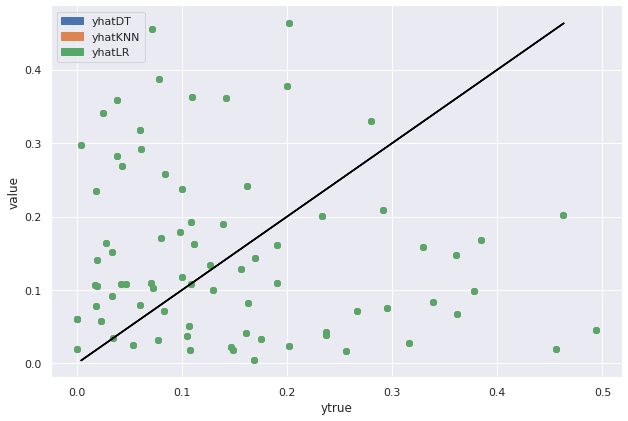

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

from seaborn_qqplot import pplot

#--------
### GRAPH QQPLOTS

x_plt = np.linspace(1, y_hat.shape[0], y_hat.shape[0])
mod_res = np.hstack((x_plt[:,np.newaxis],
                     y_test[:,np.newaxis],
                     y_hat,
                     y_hatknn,
                     y_hatdt[:,np.newaxis])) 

mod_res_df = pd.DataFrame(mod_res, 
                          columns=['index', 'ytrue','yhatLR', 'yhatKNN', 'yhatDT'])

mod_res_df_mlt = pd.melt(mod_res_df, 
                         id_vars=['ytrue'],
                         value_vars =['yhatLR', 'yhatKNN', 'yhatDT'])

mod_res_df_mlt['variable'] = mod_res_df_mlt['variable'].astype('category')


pplot(mod_res_df_mlt, x="ytrue", y="value", 
       hue = "variable", height = 6, aspect = 1.5,
       display_kws={"identity":True});

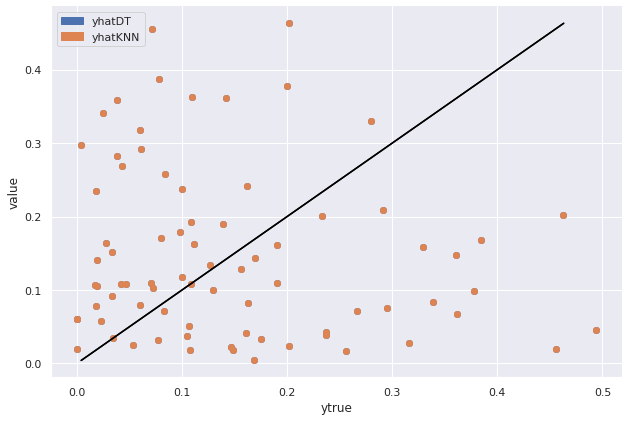

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

from seaborn_qqplot import pplot

#--------
### GRAPH QQPLOTS

x_plt = np.linspace(1, y_hat.shape[0], y_hat.shape[0])
mod_res = np.hstack((x_plt[:,np.newaxis],
                     y_test[:,np.newaxis],
#                     y_hat,
                     y_hatknn,
                     y_hatdt[:,np.newaxis])) 

mod_res_df = pd.DataFrame(mod_res, 
                          columns=['index', 'ytrue', 'yhatKNN', 'yhatDT'])

mod_res_df_mlt = pd.melt(mod_res_df, 
                         id_vars=['ytrue'],
                         value_vars =['yhatKNN', 'yhatDT'])

mod_res_df_mlt['variable'] = mod_res_df_mlt['variable'].astype('category')


pplot(mod_res_df_mlt, x="ytrue", y="value", 
       hue = "variable", height = 6, aspect = 1.5,
       display_kws={"identity":True});

In [ ]:
import warnings
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

no_poly = 5
polyFt_m = PolynomialFeatures(no_poly)



#f_regression F de Fisher and SelectKBest
warnings.filterwarnings("ignore")

no_fts = 70

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

sel = SelectKBest(f_regression, k=no_fts)
# sel = SelectKBest(mutual_info_regression, k=no_fts)
X_train_sel = sel.fit_transform(X_train_tmp, y_train)

# f_res, pval = f_regression(X_train_tmp, y_train)
# print(pval<0.001)

#Obtain a mask of True and False values: 
#true -> feat is selected
#false -> otherwise
ft_sel_msk = sel.get_support()

ft_names = polyFt_m.get_feature_names(X.columns)
ft_names = np.asarray(ft_names)

X_train_sel = pd.DataFrame(X_train_sel,
                   columns=ft_names[ft_sel_msk])

print(X_train_sel)

     per_cap_US.  ...  HDR ctrl_corrup GOV_effect^3
0       0.479777  ...                      0.096806
1       0.822869  ...                      0.220173
2       0.409037  ...                      0.228520
3       0.599368  ...                      0.286060
4       0.559429  ...                      0.414572
..           ...  ...                           ...
315     0.179557  ...                      0.043082
316     0.045851  ...                      0.001454
317     0.186552  ...                      0.038635
318     0.083048  ...                      0.004671
319     0.290574  ...                      0.002861

[320 rows x 70 columns]


In [ ]:
from sklearn.feature_selection import VarianceThreshold
 
X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)
 
sel = VarianceThreshold(threshold=(0.05))
X_train_sel = sel.fit_transform(X_train_tmp)
 
#Obtain a mask of True and False values: 
#true -> feat is selected
#false -> otherwise
ft_sel_msk = sel.get_support()
 
ft_names = polyFt_m.get_feature_names(X.columns)
ft_names = np.asarray(ft_names)
# print('Antes:', ft_names)
# print('Despues:', ft_names[ft_msk])
 
X_train_sel = pd.DataFrame(X_train_sel,
                   columns=ft_names[ft_sel_msk])
 
print(X_train_sel)

     per_cap_US.  GDP_._health  ...  ctrl_corrup^5  ctrl_corrup^4 GOV_effect
0       0.479777      0.820961  ...       0.111867                  0.098474
1       0.822869      0.267831  ...       0.369173                  0.329653
2       0.409037      0.703057  ...       0.324117                  0.327787
3       0.599368      0.113537  ...       0.484308                  0.429922
4       0.559429      0.647744  ...       0.748928                  0.682224
..           ...           ...  ...            ...                       ...
315     0.179557      0.302766  ...       0.028489                  0.032085
316     0.045851      0.170306  ...       0.000373                  0.000498
317     0.186552      0.621543  ...       0.011315                  0.016028
318     0.083048      0.372635  ...       0.000453                  0.000790
319     0.290574      0.547307  ...       0.001541                  0.001502

[320 rows x 33 columns]


In [ ]:
model_pl = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         lr_m)

model_knn = make_pipeline(sclr_01,
                          polyFt_m,
                          sel,
                          knn_m)

model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         dt_m)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

#--------
### EVALUATE CV TRAINING ERROR

scoring = {'R2': make_scorer(r2_score), 
           'RMSE': make_scorer(mean_squared_error)}

lrm_scr = cross_validate(model_pl, X_train, y_train, 
                          scoring = scoring, cv=10)
knn_scr = cross_validate(model_knn, X_train, y_train, 
                          scoring = scoring, cv=10)
dt_scr = cross_validate(model_dt, X_train, y_train, 
                         scoring = scoring, cv=10)

print('TRAIN CV ERROR----')

print('LRM_R2: ', np.mean(lrm_scr.get('test_R2')))
print('KNN_R2: ', np.mean(knn_scr.get('test_R2')))
print('DT_R2: ', np.mean(dt_scr.get('test_R2')))
print()
print('LRM_RMSE: ', np.mean(lrm_scr.get('test_RMSE')))
print('KNN_RMSE: ', np.mean(knn_scr.get('test_RMSE')))
print('DT_RMSE: ', np.mean(dt_scr.get('test_RMSE')))

TRAIN CV ERROR----
LRM_R2:  0.6439502697975967
KNN_R2:  0.7563931540550507
DT_R2:  0.6786865405677407

LRM_RMSE:  0.005606583714703493
KNN_RMSE:  0.0037127332920480196
DT_RMSE:  0.0044671327744626906


In [1]:
#pip install shap xgboost

In [2]:
import argparse
import shap
shap.initjs()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import xgboost as xgb
from xgboost import XGBRegressor,XGBClassifier,XGBRFRegressor
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,RepeatedKFold,cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd

In [4]:
no_poly = 5

std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()

lr_m  = LinearRegression()
knn_m = KNeighborsRegressor(n_neighbors=5)
dt_m  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)


max_depth = 3
min_child_weight = 10
subsample = 0.9
colsample_bytree = 0.2
#objective ='reg:logistic'
objective ='reg:squarederror'
num_estimators = 100
learning_rate = 0.3

xgb_r = XGBRegressor(max_depth=max_depth,
                min_child_weight=min_child_weight,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                objective=objective,
                n_estimators=num_estimators,
                learning_rate=learning_rate)

polyFt_m = PolynomialFeatures(no_poly)

In [5]:
model_pl = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         lr_m)

model_knn = make_pipeline(sclr_01,
                          polyFt_m,
                          sel,
                          knn_m)

model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         dt_m)


model_xgb  = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         xgb_r)

NameError: name 'sel' is not defined

In [ ]:
X = ccpp_df.iloc[:,12:20]
y = ccpp_df['multi_R_perc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=242)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
 
X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)
 
sel = VarianceThreshold(threshold=(0.05))
X_train_sel = sel.fit_transform(X_train_tmp)
 
#Obtain a mask of True and False values: 
#true -> feat is selected
#false -> otherwise
ft_sel_msk = sel.get_support()
 
ft_names = polyFt_m.get_feature_names(X.columns)
ft_names = np.asarray(ft_names)
# print('Antes:', ft_names)
# print('Despues:', ft_names[ft_msk])
 
X_train_sel = pd.DataFrame(X_train_sel,
                   columns=ft_names[ft_sel_msk])
 
print(X_train_sel)

     per_cap_US.  GDP_._health  ...  ctrl_corrup^5  ctrl_corrup^4 GOV_effect
0       0.072064      0.304221  ...   1.266546e-04                  0.000256
1       0.027686      0.048035  ...   5.813641e-07                  0.000001
2       0.854782      0.836972  ...   6.466062e-01                  0.608024
3       0.052590      0.321689  ...   1.033623e-04                  0.000191
4       0.126022      0.339156  ...   3.003127e-04                  0.000713
..           ...           ...  ...            ...                       ...
315     0.485228      0.810771  ...   1.523381e-01                  0.159777
316     0.491905      0.818049  ...   3.028184e-01                  0.309800
317     0.427363      0.688501  ...   6.501323e-01                  0.569919
318     0.489456      0.524017  ...   6.344928e-01                  0.591956
319     0.280476      0.627365  ...   2.962776e-02                  0.029550

[320 rows x 36 columns]


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

#--------
### EVALUATE CV TRAINING ERROR

scoring = {'R2': make_scorer(r2_score), 
           'RMSE': make_scorer(mean_squared_error)}

lrm_scr = cross_validate(model_pl, X_train, y_train, 
                          scoring = scoring, cv=10)
knn_scr = cross_validate(model_knn, X_train, y_train, 
                          scoring = scoring, cv=10)
dt_scr = cross_validate(model_dt, X_train, y_train, 
                         scoring = scoring, cv=10)

xgb_scr = cross_validate(model_xgb, X_train, y_train, 
                         scoring = scoring, cv=10)

print('TRAIN CV ERROR----')

print('LRM_R2: ', np.mean(lrm_scr.get('test_R2')))
print('KNN_R2: ', np.mean(knn_scr.get('test_R2')))
print('DT_R2: ', np.mean(dt_scr.get('test_R2')))
print('XGB_R2: ', np.mean(xgb_scr.get('test_R2')))
print()
print('LRM_RMSE: ', np.mean(lrm_scr.get('test_RMSE')))
print('KNN_RMSE: ', np.mean(knn_scr.get('test_RMSE')))
print('DT_RMSE: ', np.mean(dt_scr.get('test_RMSE')))
print('XGB_RMSE: ', np.mean(xgb_scr.get('test_RMSE')))

TRAIN CV ERROR----
LRM_R2:  0.27054119263830784
KNN_R2:  0.7561000459138102
DT_R2:  0.621720080570213
XGB_R2:  0.7545598559724171

LRM_RMSE:  0.012200042584055458
KNN_RMSE:  0.003917351397338726
DT_RMSE:  0.0062289242605208526
XGB_RMSE:  0.004018172878441067


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

poly_grade = 3

std_scl = StandardScaler()
poly = PolynomialFeatures(poly_grade)


df = pd.read_csv('data_final_multi.csv')

X = df.iloc[:,12:20]
y = df['multi_R_perc']

# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.2, 
#                                                     random_state=1)

#Standardize X_train into X_train_scl
X_train_scl = std_scl.fit_transform(X) #Standardize and assign it to a variable

#Construct a DataFrame with column names
X_train_scl_df = pd.DataFrame(X_train_scl, 
                              index=X.index, 
                              columns=X.columns)

#Create PolynomialFeatures -> get their names
p_model     = poly.fit(X_train_scl_df)
poly_names  = p_model.get_feature_names(X_train_scl_df.columns)

#Transform X_train_scl into X_train_poly where polynomial features are stored
X_train_poly    = poly.fit_transform(X_train_scl_df)
X_train_poly_df = pd.DataFrame(X_train_poly, 
                              index=X.index, 
                              columns= poly_names)

#Create the full Train_df which is the matrix composed by Xy
all_names = np.concatenate((X_train_poly_df.columns, 'multi_R_perc'), axis=None)
Train_ndarray = np.hstack([X_train_poly_df, y[:, np.newaxis]])

Train_df = pd.DataFrame(Train_ndarray, 
                              index=X.index, 
                              columns = all_names)

# Compute the correlation matrix
corr_mtx = Train_df.corr()
# corr_mtx = Train_df.corr('spearman')

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_mtx, dtype=np.bool))

f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr_mtx, 
            # mask=mask, 
            cmap=sns.color_palette("coolwarm", 20))
# sns.heatmap(corr_mtx,ax=ax, cmap ="YlGnBu", linewidths = 0.1,)


In [17]:
#!pip install xgboost

In [18]:
#!pip install shap

In [19]:
import argparse
import shap
shap.initjs()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import xgboost as xgb
from xgboost import XGBRegressor,XGBClassifier,XGBRFRegressor
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,RepeatedKFold,cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [7]:
ccpp_df = pd.read_csv('data_final_multi.csv')
#ccpp_df

In [8]:
X = ccpp_df.iloc[:,12:20]
y = ccpp_df['multi_R_perc']
#y = ccpp_df['r_index']

In [9]:
def training(X,y):
    """" Training - fine tuning """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=242)
    max_depth = 3
    min_child_weight = 10
    subsample = 0.9
    colsample_bytree = 0.2
    objective ='reg:logistic'
#    objective ='reg:squarederror'
    num_estimators = 100
    learning_rate = 0.3
        
#    sample_weights = class_weight.compute_sample_weight('balanced', y_train) #clases desbalanceadas
    # define the model evaluation procedure
#    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=442)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)    
#    parameters=parameters

    # estimator = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
    # grid = GridSearchCV(estimator=estimator, param_grid=parameters, cv = cv, scoring='roc_auc')
    # model = grid.fit(X_train,y_train)
#    model = XGBRFRegressor(n_estimators=10000, subsample=0.9, colsample_bynode=0.2)
    model = XGBRegressor(max_depth=max_depth,
                min_child_weight=min_child_weight,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                objective=objective,
                n_estimators=num_estimators,
                learning_rate=learning_rate)
    model.fit(X_train, y_train)      
    n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # define the model evaluation procedure
    print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

    return model, X_train, X_test, y_train, y_test

In [14]:
def generating_metrics(model_ehr, x, y):
    """Función para generar las métricas: AUC, sensibilidad, especificidad, F1, precisión"""
    y_pred_proba = model_ehr.predict_proba(x)[:, 1]
    y_pred = model_ehr.predict(x)
    acc = accuracy_score(y,y_pred)
    tn, fp, fn, tp = confusion_matrix(y,y_pred).ravel()
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_pred)
    sensitivity = tp / (tp+fn)
    specificity = tn / (tn+fp)
    auc_score = auc(false_positive_rate, true_positive_rate)
    f1 = f1_score(y, y_pred)
    return auc_score, sensitivity, specificity, f1, acc, false_positive_rate, true_positive_rate

def plot_roc(model,X_test, y_test,name):
    """Función para generar la curva ROC"""
    print("mean_cross_val_score: ", model.best_score_)
    print("best_params:",model.best_params_)
    print("=============================================================================")
    auc_test, sens_test, spec_test, f1_test, acc_test,fpr_test, tpr_test = generating_metrics(model, 
                                                                                              X_test, y_test)
    print("auc_test: {}, sens_test {}, spec_test: {}, f1_test {}, acc_test {}".format(auc_test, sens_test, spec_test, f1_test, acc_test))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_test, tpr_test, label='Testing (AUC=%0.2f)' % auc_test, color='darkorange')
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.legend(loc='best')
    plt.title('Curva ROC del modelo de predicción de mortalidad')
    plt.show()
    name_roc = name+'.png'
    plt.savefig(name_roc)

def plot_shap_values(model,X,feature_list,title):
    """Función para identificar las variables clínicas"""
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    plt.title(title)
    shap.summary_plot(shap_values, X, feature_names=feature_list, plot_type='bar')
    plt.savefig('ShapValues_XGBOOST1.png')
    plt.title(title)
    shap.summary_plot(shap_values, X,feature_names=feature_list,show = 'False')
    plt.savefig('ShapValues_XGBOOST2.png')

def saving_model(model,model_name,logs_file):
    """Función para guardar el modelo"""
    import joblib
    model_name = model_name + '.pkl'
    url_save = os.path.join(logs_file,str(model_name))
    print(url_save)
    joblib.dump(model, url_save)

MAE: -0.052 (0.008)
Feature list: 
 Index(['per_cap_US.', 'GDP_total', 'GDP_._health', 'Out_pocket_exp', 'HDR',
       'ctrl_corrup', 'GOV_effect', 'rule_law'],
      dtype='object')


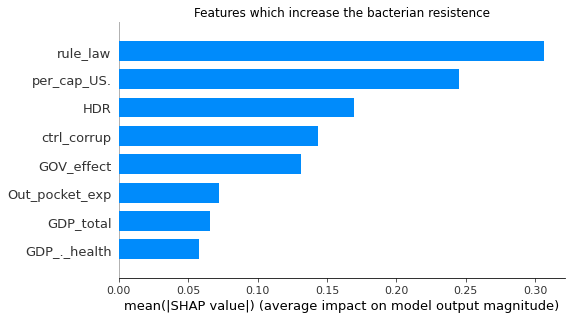

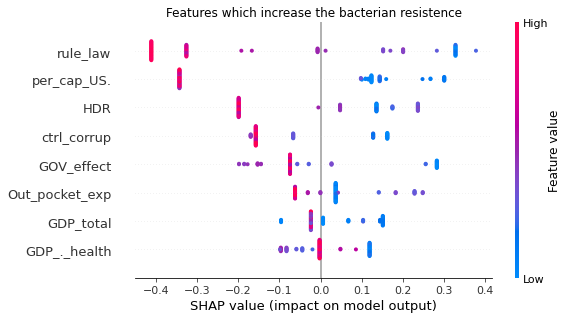

<Figure size 432x288 with 0 Axes>

In [15]:
#X = ccpp_df.iloc[:,15:24]
#y = ccpp_df['r_index']/100.
y = ccpp_df['multi_R_perc']

model,X_train, X_test, y_train, y_test = training(X,y)
print("Feature list: \n", X.columns)

feature_list = X.columns
#plot_roc(model,X_test, y_test,'model')
title = "Features which increase the bacterian resistence"
plot_shap_values(model,X_test,feature_list,title)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline

y_hat = model.predict(X_test)
# y_hat = model_pl.predict(X_train)

print('R2: ',r2_score(y_test,y_hat))
# r2_score(y_train,y_hat)
print('RMSE: ',mean_squared_error(y_test,y_hat, squared=False), 'MW')

R2:  0.6592590038857903
RMSE:  0.07447139565689417 MW


In [21]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'continuous'

In [22]:
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
model.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=0.2, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=12,
               num_parallel_tree=100, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1, subsample=0.9,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
model.predict(X_test)

array([0.14837293, 0.11366484, 0.16792317, 0.02901112, 0.15475658,
       0.02271463, 0.14741835, 0.06823863, 0.05406199, 0.25273058,
       0.2264963 , 0.3084961 , 0.03471179, 0.04535307, 0.28215444,
       0.06740549, 0.48982403, 0.17766012, 0.26330563, 0.24443302,
       0.03798553, 0.34868246, 0.22988977, 0.0522879 , 0.05656939,
       0.22119346, 0.14332442, 0.15534827, 0.07076139, 0.10849072,
       0.03029923, 0.04802478, 0.10205209, 0.14362432, 0.20068969,
       0.41332126, 0.26951528, 0.03938593, 0.02444621, 0.23164064,
       0.06191616, 0.12810868, 0.03728013, 0.22291064, 0.02216333,
       0.22236556, 0.07528743, 0.21679959, 0.04774958, 0.21427985,
       0.10678249, 0.14437988, 0.27183452, 0.03962908, 0.04671859,
       0.13837543, 0.15054417, 0.16794832, 0.2175735 , 0.15702173,
       0.19387282, 0.08583701, 0.0245585 , 0.12931025, 0.53984725,
       0.05079472, 0.07373844, 0.2916365 , 0.0599913 , 0.1415713 ,
       0.30413467, 0.02106215, 0.20791014, 0.06002529, 0.31957

In [24]:
def model_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=feature_list)
    return model.predict(data_asframe)

In [45]:
rf_explainer = shap.KernelExplainer(model_predict, X_test)
rf_shap_values = rf_explainer.shap_values(X_test)

  0%|          | 0/81 [00:00<?, ?it/s]

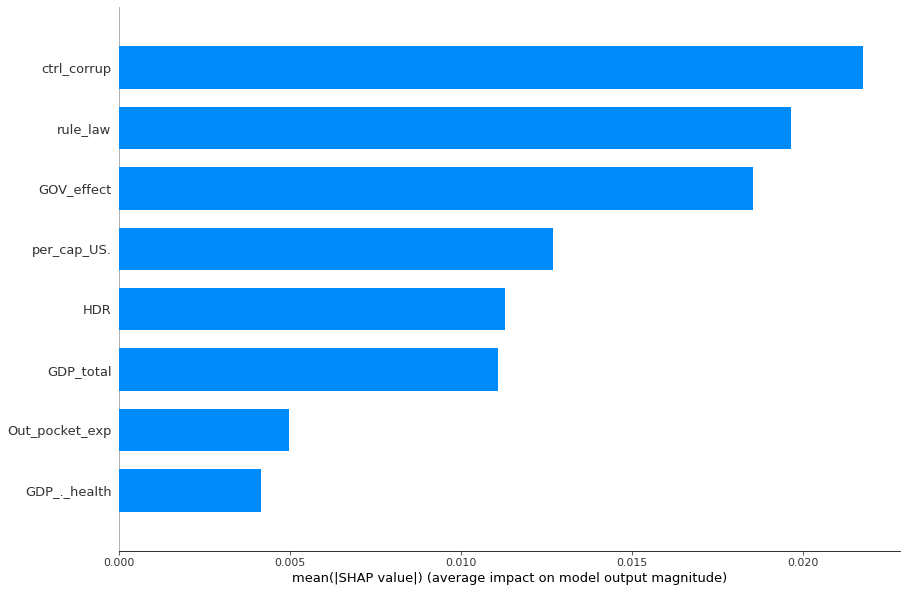

In [46]:
#plt.rcParams["figure.figsize"] = [18,9]
plt.figure()
fig=shap.summary_plot(rf_shap_values, X_test, plot_type="bar",plot_size=(14,10),show=False)
plt.savefig('shapXGB_test.pdf')

In [48]:
y_hat = model.predict(X_test)
# y_hat = model_pl.predict(X_train)

print('R2: ',r2_score(y_test,y_hat))
# r2_score(y_train,y_hat)
print('RMSE: ',mean_squared_error(y_test,y_hat, squared=False))

R2:  0.7365154884392896
RMSE:  0.06548696209174458


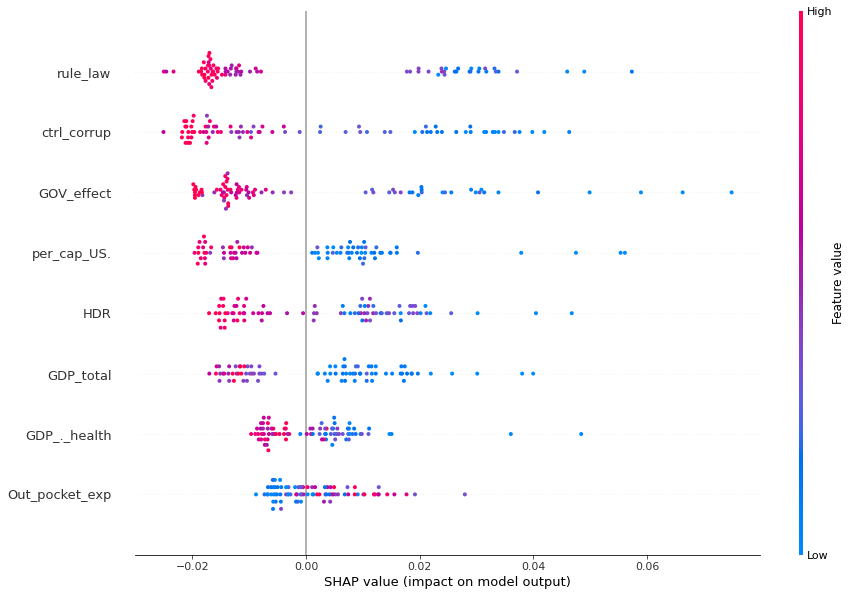

In [58]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test,feature_names=feature_list,plot_size=(14,10),show = False)
plt.savefig('shapXGB_featureV_test.pdf')

In [43]:
rf_explainer = shap.KernelExplainer(model_predict, X_train)
rf_shap_values = rf_explainer.shap_values(X_train)

Using 320 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/320 [00:00<?, ?it/s]

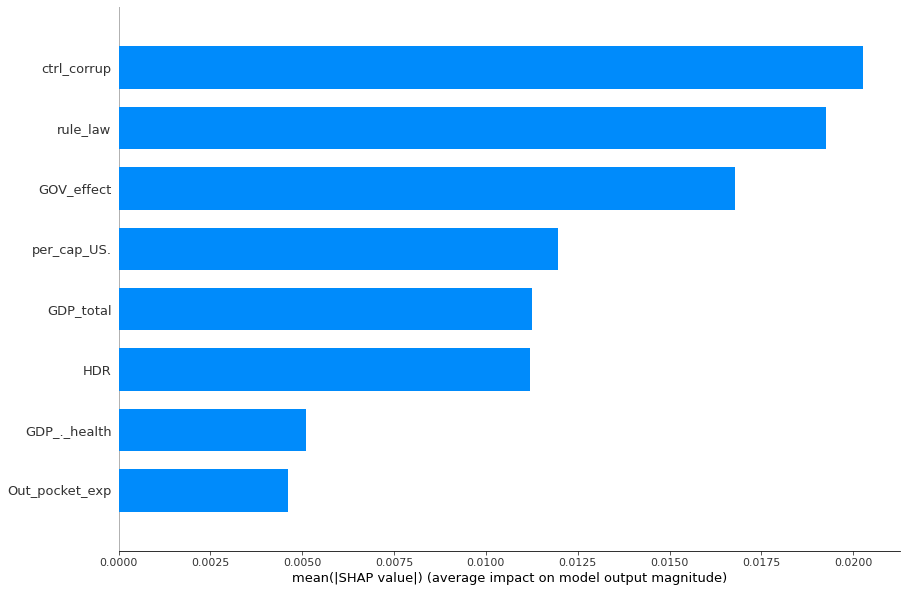

In [44]:
shap.summary_plot(rf_shap_values, X_train, plot_type="bar",plot_size=(14,10),show=False)
plt.savefig('shapXGB_train.pdf')

In [49]:
y_hat = model.predict(X_train)
# y_hat = model_pl.predict(X_train)

print('R2: ',r2_score(y_train,y_hat))
# r2_score(y_train,y_hat)
print('RMSE: ',mean_squared_error(y_train,y_hat, squared=False))

R2:  0.9273893396109811
RMSE:  0.03417246654205698


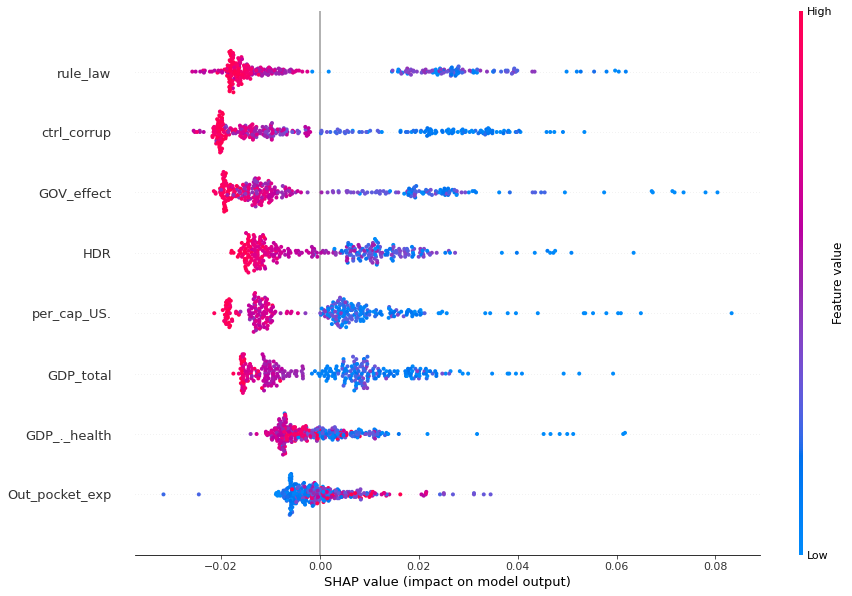

In [57]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train,feature_names=feature_list,plot_size=(14,10),show = False)
plt.savefig('shapXGB_featureV_train.pdf')

[01:20:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.08756537 0.11521929 0.08967007 0.08351848 0.07844005 0.12682463
 0.11177067 0.15768804 0.1493034 ]


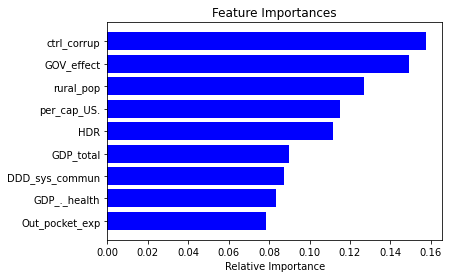

In [ ]:
#rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
model.fit(X_train, y_train)  
print(model.feature_importances_)

importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

[0.06903562 0.04142528 0.0306615  0.03635333 0.05577362 0.10240553
 0.02874377 0.5884525  0.04714886]


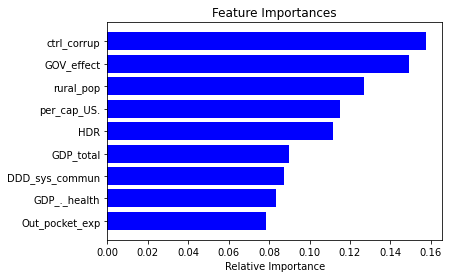

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=20)
rf.fit(X_train, y_train)
print(rf.feature_importances_)

importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()  

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ccpp_df = pd.read_csv('data_final_multi.csv')
ccpp_df

,Bacteria,Year,Code_C,Country,Region,Aminoglycosides,Carbapenems,Ceftazidime,Fluoroquinolones,Piperacilina_taz,pca_1,multi_R_perc,per_cap_US.,GDP_total,GDP_._health,Out_pocket_exp,HDR,ctrl_corrup,GOV_effect,rule_law
0,Pseudomonas aeruginosa,2005,AT,Austria,Western,0.064935,0.103896,0.065789,0.142857,0.129870,-1.150640,0.064935,3709.0,38403.133880,9.63,19.183260,0.855,1.922060,1.684595,1.859191
1,Pseudomonas aeruginosa,2005,BG,Bulgaria,Eastern,0.529412,0.375000,0.454545,0.470588,0.500000,4.765291,0.470588,267.7,3899.907638,6.94,38.867414,0.750,0.057295,0.181857,-0.095587
2,Pseudomonas aeruginosa,2005,CY,Cyprus,Southern,0.108108,0.111111,0.243243,0.270270,0.270270,0.527297,0.189189,1366.0,24959.259170,5.44,49.832198,0.830,0.906869,1.157761,0.887087
3,Pseudomonas aeruginosa,2005,CZ,Czechia,Eastern,0.278261,0.311284,0.396887,0.453125,0.206226,2.594104,0.307393,852.7,13346.176390,6.38,11.092852,0.835,0.487308,0.925237,0.867528
4,Pseudomonas aeruginosa,2005,DE,Germany,Western,0.119658,0.247863,0.106195,0.226087,0.181034,0.060663,0.162393,3547.0,34507.368810,10.23,14.089450,0.900,1.885013,1.505681,1.663715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Pseudomonas aeruginosa,2018,PT,Portugal,Southern,0.119026,0.157040,0.186239,0.237319,0.218978,0.221695,0.152527,1908.0,23461.571860,8.97,27.532080,0.850,0.849960,1.208909,1.140163
397,Pseudomonas aeruginosa,2018,RO,Romania,Eastern,0.506849,0.551282,0.467105,0.522581,0.492754,5.471816,0.493506,555.1,12408.596490,5.16,20.488046,0.816,-0.121651,-0.253442,0.325064
398,Pseudomonas aeruginosa,2018,SE,Sweden,Northern,0.009732,0.043689,0.060680,0.071078,0.077859,-1.918051,0.019417,5905.0,54589.060390,11.02,15.032604,0.937,2.139882,1.830975,1.894910
399,Pseudomonas aeruginosa,2018,SK,Slovakia,Eastern,0.374016,0.439516,0.320675,0.523810,0.368644,3.760121,0.358871,1186.0,19428.116210,6.74,18.713185,0.857,0.362984,0.707462,0.528572


In [3]:
#X = ccpp_df.iloc[:,12:20]  # features
X  = ccpp_df[['ctrl_corrup','rule_law','HDR']]
y = ccpp_df['multi_R_perc']

In [5]:
import shap
import xgboost
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl

In [6]:
xgb_full = xgboost.DMatrix(X, label=y)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
xgb_train = xgboost.DMatrix(X_train, label=y_train)
xgb_test = xgboost.DMatrix(X_test, label=y_test)

In [7]:
X_train.head()

,ctrl_corrup,rule_law,HDR
98,2.118235,1.761363,0.906
81,0.358294,0.914494,0.854
50,2.013397,1.960128,0.881
244,2.294475,1.980010,0.946
340,0.229156,0.646802,0.851


In [8]:
# use validation set to choose # of trees
params = {
#    "eta": 0.002, # learning_rate
    "eta": 0.3,
    "max_depth": 3,
#    "objective": "survival:cox",
    "subsample": 0.5
}
model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)

[0]	test-rmse:0.27009
[1000]	test-rmse:0.08224
[2000]	test-rmse:0.08229
[3000]	test-rmse:0.08230
[4000]	test-rmse:0.08231
[5000]	test-rmse:0.08231
[6000]	test-rmse:0.08230
[7000]	test-rmse:0.08231
[8000]	test-rmse:0.08231
[9000]	test-rmse:0.08231
[9999]	test-rmse:0.08232


In [9]:
# train final model on the full data set
model = xgboost.train(params, xgb_full, 5000, evals = [(xgb_full, "test")], verbose_eval=1000)

[0]	test-rmse:0.27250
[1000]	test-rmse:0.00087
[2000]	test-rmse:0.00049
[3000]	test-rmse:0.00046
[4000]	test-rmse:0.00044
[4999]	test-rmse:0.00043


In [10]:
def c_statistic_harrell(pred, labels):
    total = 0
    matches = 0
    for i in range(len(labels)):
        for j in range(len(labels)):
            if labels[j] > 0 and abs(labels[i]) > labels[j]:
                total += 1
                if pred[j] > pred[i]:
                    matches += 1
    return matches/total

In [11]:
# see how well we can order people by survival
#c_statistic_harrell(model_train.predict(xgb_test, ntree_limit=5000), y_test)

In [12]:
shap_values = shap.TreeExplainer(model).shap_values(X)

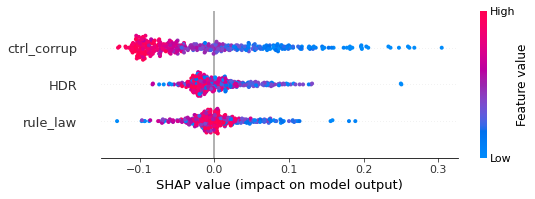

In [13]:
shap.summary_plot(shap_values, X)

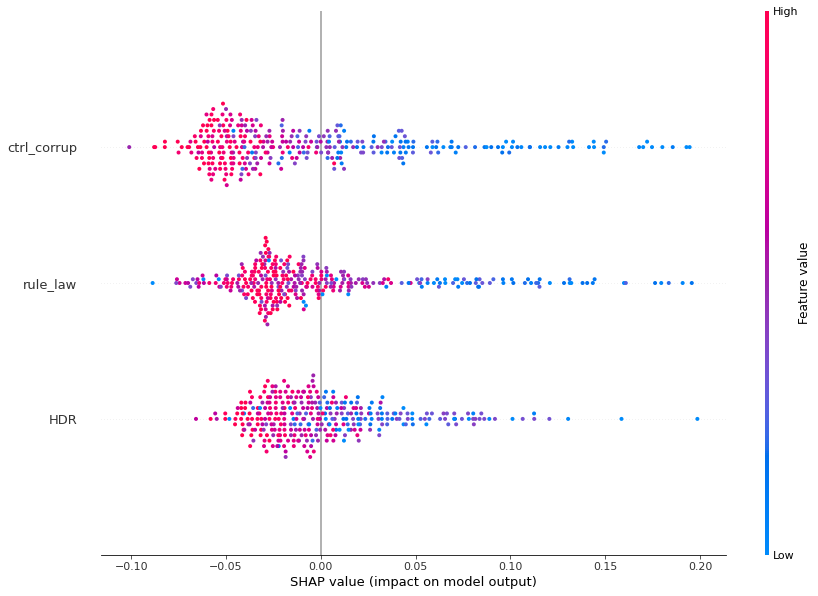

In [19]:
shap_values = shap.TreeExplainer(model_train).shap_values(X_train)
shap.summary_plot(shap_values, X_train,plot_size=(14,10),show = False)
plt.savefig('shapXGB_fewFeatureV_train2.pdf')

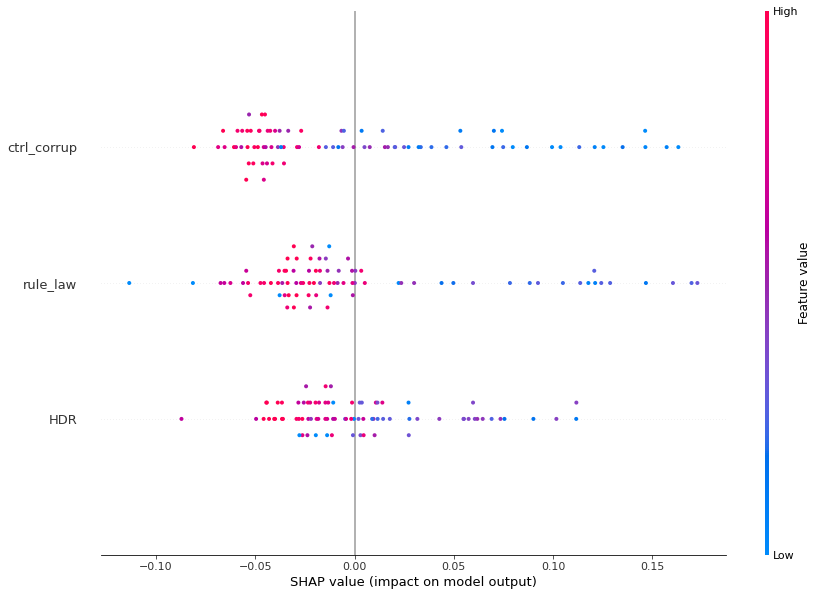

In [20]:
shap_values = shap.TreeExplainer(model_train).shap_values(X_test)
shap.summary_plot(shap_values, X_test,plot_size=(14,10),show = False)
plt.savefig('shapXGB_fewFeatureV_test2.pdf')

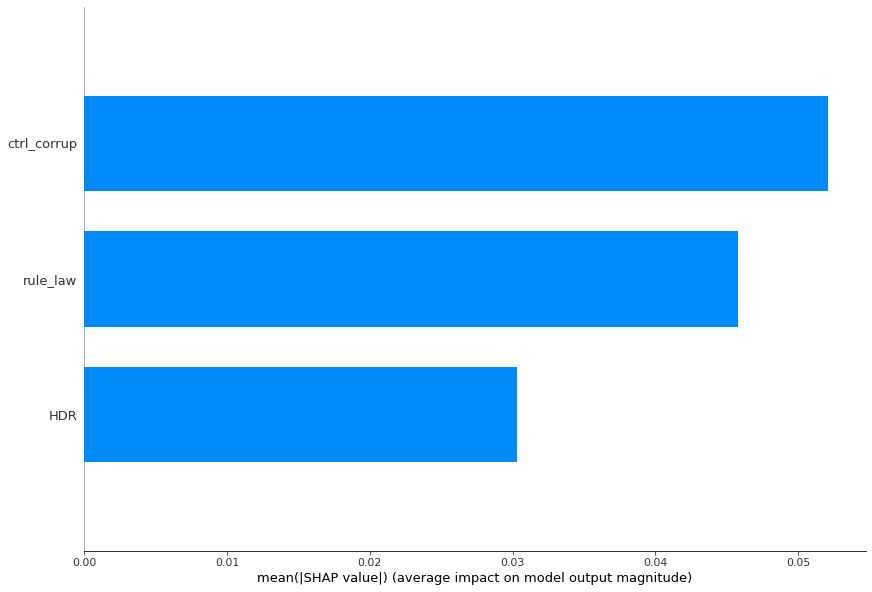

In [21]:
shap.summary_plot(shap_values, X_train, plot_type="bar",plot_size=(14,10),show=False)
plt.savefig('shapXGB_fewFeatures_train2.pdf')

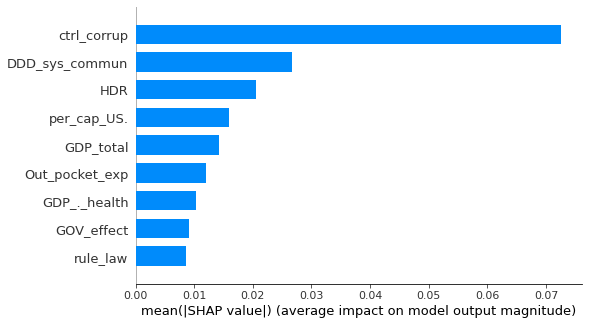

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

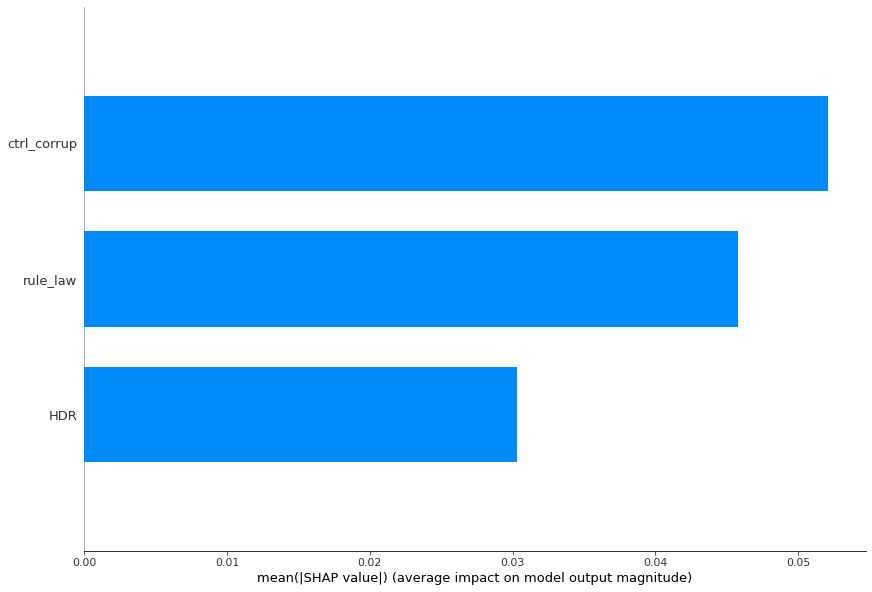

In [22]:
shap_values = shap.TreeExplainer(model_train).shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",plot_size=(14,10),show=False)
plt.savefig('shapXGB_fewFeatures_test2.pdf')

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline

y_hat = model_train.predict(xgb_test)
# y_hat = model_pl.predict(X_train)

print('R2: ',r2_score(y_test,y_hat))
# r2_score(y_train,y_hat)
print('RMSE: ',mean_squared_error(y_test,y_hat, squared=False))

R2:  0.6017864372835469
RMSE:  0.08231834284202895


In [ ]:
y_test.shape
y_test

265    0.217158
65     0.266304
120    0.000000
132    0.019355
379    0.062500
         ...   
59     0.065574
363    0.021309
74     0.059895
79     0.434783
270    0.048780
Name: multi_R_perc, Length: 81, dtype: float64

In [ ]:
y_hat

array([ 1.56070754e-01,  2.50344098e-01,  2.52531506e-02, -1.93397922e-04,
        3.77704799e-02,  2.46055230e-01,  1.09203108e-01,  1.08888820e-01,
        3.90426129e-01,  1.54792517e-01,  7.51970485e-02,  1.17082372e-02,
        2.04161014e-02,  7.45679438e-02,  3.39177430e-01,  4.37196530e-02,
        1.20484464e-01,  4.85805392e-01,  1.91155851e-01,  1.50301442e-01,
        2.04760924e-01,  1.18341468e-01,  4.14801948e-02,  1.11030966e-01,
        9.28839445e-02,  1.81133673e-01,  8.08863863e-02,  1.77808523e-01,
        8.25458393e-02,  3.05154845e-02,  2.09233668e-02,  6.81476966e-02,
        1.31259605e-01,  1.77446768e-01,  1.38372004e-01,  2.07170382e-01,
        2.05374926e-01,  2.60504894e-02,  2.07266644e-01,  3.20909292e-01,
        4.73929435e-01,  1.70147289e-02,  1.48486733e-01,  2.71081656e-01,
        1.48659170e-01,  2.91144490e-01,  1.49125963e-01,  5.14272647e-03,
        2.07087338e-01,  1.47118807e-01,  1.72915563e-01,  3.13491523e-02,
        1.08474018e-02,  

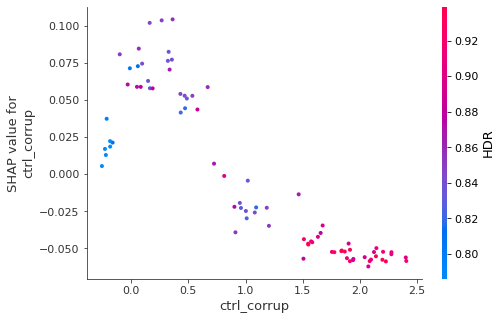

In [ ]:
shap.dependence_plot('ctrl_corrup',shap_values,X_test)

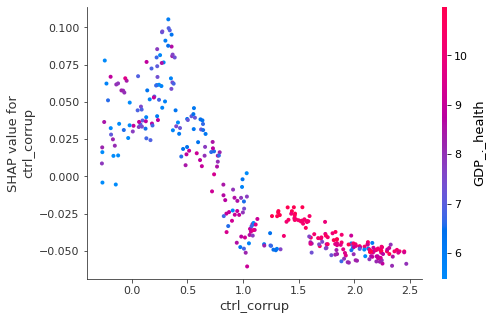

In [ ]:
shap_values = shap.TreeExplainer(model_train).shap_values(X_train)
shap.dependence_plot('ctrl_corrup',shap_values,X_train)

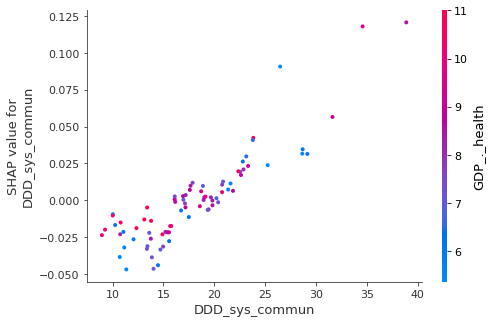

In [ ]:
shap.dependence_plot('DDD_sys_commun',shap_values,X_test)

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(model_train)
shap.force_plot(explainer.expected_value,shap_values[0] , X_test.iloc[0])

In [ ]:
shap.initjs()
shap_values = shap.TreeExplainer(model_train).shap_values(X_test)
shap.force_plot(explainer.expected_value,shap_values , X_test)

In [24]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=2, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=2)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline

y_hat = model.predict(X_test)
# y_hat = model_pl.predict(X_train)

print('R2: ',r2_score(y_test,y_hat))
# r2_score(y_train,y_hat)
print('RMSE: ',mean_squared_error(y_test,y_hat, squared=False))

R2:  0.614218790800451
RMSE:  0.0823558821423509


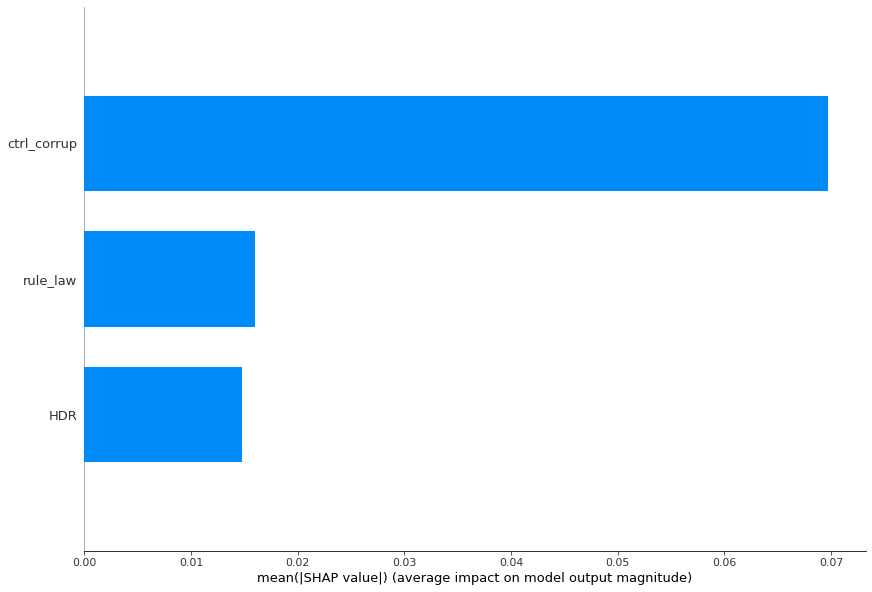

In [26]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar",plot_size=(14,10),show=False)
plt.savefig('shapRF_fewFeatures_train.pdf')

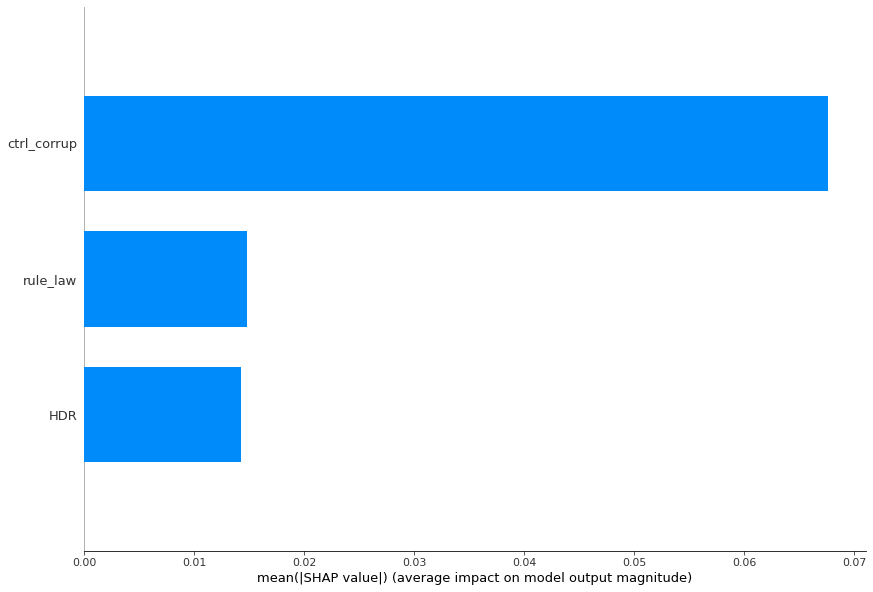

In [27]:
shap_values = shap.TreeExplainer(model).shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar",plot_size=(14,10),show=False)
plt.savefig('shapRF_fewFeatures_test.pdf')

[0.11516781 0.04784178 0.0229932  0.02889699 0.03842135 0.04903181
 0.3720146  0.0427741  0.28285836]


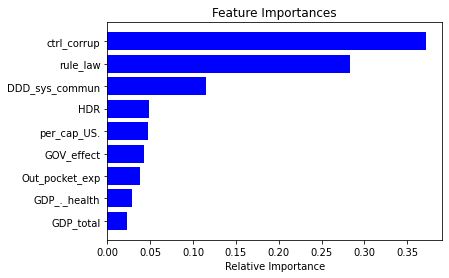

In [ ]:
print(model.feature_importances_)

importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()  

In [86]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 

dt_m1  = DecisionTreeRegressor(criterion='mse',
                              max_depth=5,
                              min_samples_split = 20, 
                              random_state=0)


model.fit(X_train, y_train[:, np.newaxis]);

f, ax = plt.subplots(figsize=(45, 9))
tree.plot_tree(model);

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names = model.feature_importances_,
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("Random_Forest") 

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
import six
from sklearn import tree
dotfile = six.StringIO()

i_tree = 0
for tree_in_forest in model.estimators_:
    if (i_tree <1):
       export_graphviz(tree_in_forest,
                feature_names=X.columns,
                filled=True,
                rounded=True)        
      #  tree.export_graphviz(tree_in_forest, out_file=dotfile)
      #  pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
      #  i_tree = i_tree + 1

export_graphviz(tree_in_forest,
                feature_names=X.columns,
                filled=True,
                rounded=True)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="ctrl_corrup <= 0.695\\nmse = 0.014\\nsamples = 202\\nvalue = 0.139", fillcolor="#f9e2d1"] ;\n1 [label="DDD_sys_commun <= 25.784\\nmse = 0.011\\nsamples = 72\\nvalue = 0.257", fillcolor="#f4c9aa"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Out_pocket_exp <= 23.687\\nmse = 0.007\\nsamples = 61\\nvalue = 0.233", fillcolor="#f5ceb2"] ;\n1 -> 2 ;\n3 [label="GDP_._health <= 6.765\\nmse = 0.006\\nsamples = 31\\nvalue = 0.273", fillcolor="#f3c6a5"] ;\n2 -> 3 ;\n4 [label="DDD_sys_commun <= 23.882\\nmse = 0.003\\nsamples = 10\\nvalue = 0.347", fillcolor="#f0b68d"] ;\n3 -> 4 ;\n5 [label="GDP_._health <= 6.72\\nmse = 0.001\\nsamples = 9\\nvalue = 0.339", fillcolor="#f0b88f"] ;\n4 -> 5 ;\n6 [label="mse = 0.0\\nsamples = 7\\nvalue = 0.315", fillcolor="#f1bd97"] ;\n5 -> 6 ;\n7 [label="mse = 0.0\\nsamples = 2\\nvalue = 0.386", fillcolo

In [ ]:
import os
os.system('dot -Tpng tree.dot -o tree.png')

512

In [ ]:
#pip install linearmodels

     |████████████████████████████████| 1.5MB 12.7MB/s 
     |████████████████████████████████| 9.5MB 46.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Import and preprocess data
import pandas as pd
dataset = pd.read_csv('Guns.csv', usecols = ['state','year', 'income', 'violent'],\
 index_col = ['state', 'year'])
years = dataset.index.get_level_values('year').to_list()
dataset['year'] = pd.Categorical(years)

In [ ]:
dataset

violent     income  year
state   year                          
Alabama 1977    414.4   9563.148  1977
        1978    419.1   9932.000  1978
        1979    413.3   9877.028  1979
        1980    448.5   9541.428  1980
        1981    470.5   9548.351  1981
...               ...        ...   ...
Wyoming 1995    254.2  14070.160  1995
        1996    249.7  14032.230  1996
        1997    255.2  14790.980  1997
        1998    247.6  15225.510  1998
        1999    232.3  15765.070  1999

[1173 rows x 3 columns]

In [ ]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm
exog = sm.tools.tools.add_constant(dataset['income'])
endog = dataset['violent']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

In [ ]:
exog

const     income
state   year                  
Alabama 1977    1.0   9563.148
        1978    1.0   9932.000
        1979    1.0   9877.028
        1980    1.0   9541.428
        1981    1.0   9548.351
...             ...        ...
Wyoming 1995    1.0  14070.160
        1996    1.0  14032.230
        1997    1.0  14790.980
        1998    1.0  15225.510
        1999    1.0  15765.070

[1173 rows x 2 columns]

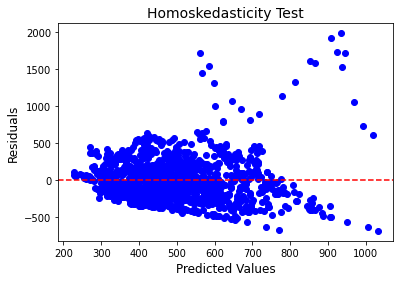

In [ ]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 12)
ax.set_ylabel('Residuals', fontsize = 12)
ax.set_title('Homoskedasticity Test', fontsize = 14)
plt.show()

In [ ]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([dataset, residuals_pooled_OLS], axis=1)

dataset
residuals_pooled_OLS
pooled_OLS_dataset

violent     income  year    residual
state   year                                      
Alabama 1977    414.4   9563.148  1977  133.505186
        1978    419.1   9932.000  1978  118.513111
        1979    413.3   9877.028  1979  115.647927
        1980    448.5   9541.428  1980  168.764762
        1981    470.5   9548.351  1981  190.395161
...               ...        ...   ...         ...
Wyoming 1995    254.2  14070.160  1995 -267.312787
        1996    249.7  14032.230  1996 -269.787801
        1997    255.2  14790.980  1997 -304.795544
        1998    247.6  15225.510  1998 -335.594002
        1999    232.3  15765.070  1999 -379.699746

[1173 rows x 4 columns]

In [ ]:
pooled_OLS_dataset[['residual']]

residual
state   year            
Alabama 1977  133.505186
        1978  118.513111
        1979  115.647927
        1980  168.764762
        1981  190.395161
...                  ...
Wyoming 1995 -267.312787
        1996 -269.787801
        1997 -304.795544
        1998 -335.594002
        1999 -379.699746

[1173 rows x 1 columns]

In [ ]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([dataset, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(dataset['income']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))


{'LM-Stat': 200.15502156044516, 'LM p-val': 3.4426217285898363e-44, 'F-Stat': 120.35903993735378, 'F p-val': 2.925453555718113e-48}


In [ ]:
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 110.96166044221732, 'LM p-val': 6.032616972194746e-26, 'F-Stat': 122.34596392437214, 'F p-val': 4.048137598792713e-27}


In [ ]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.08937264851640209


In [ ]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
exog = sm.tools.tools.add_constant(dataset['income'])
endog = dataset['violent']
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                violent   R-squared:                        0.1128
Estimator:              RandomEffects   R-squared (Between):              0.1159
No. Observations:                1173   R-squared (Within):               0.1127
Date:                Mon, Mar 29 2021   R-squared (Overall):              0.1156
Time:                        18:41:47   Log-likelihood                   -7109.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      148.90
Entities:                          51   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                  F(1,1171)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             148.90
                            

In [ ]:
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results

print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                violent   R-squared:                        0.1127
Estimator:                   PanelOLS   R-squared (Between):              0.1141
No. Observations:                1173   R-squared (Within):               0.1127
Date:                Mon, Mar 29 2021   R-squared (Overall):              0.1140
Time:                        18:41:52   Log-likelihood                   -7081.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      142.39
Entities:                          51   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                  F(1,1121)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             142.39
                            

In [ ]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [ ]:
def hausman(fe, re):
 b = fe.params
 B = re.params
 v_b = fe.cov
 v_B = re.cov
 df = b[np.abs(b) < 1e8].size
 chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
 pval = stats.chi2.sf(chi2, df)
 return chi2, df, pval

In [ ]:
hausman_results = hausman(fe_res, re_res) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: 9.42637134337692
degrees of freedom: 2
p-Value: 0.008976136961460624


In [ ]:
import pandas as pd
import numpy as np

Dataset = pd.read_csv('data_final_multi.csv', usecols = ['Country','Year','DDD_sys_commun',
                      'per_cap_US.',	'GDP_total','GDP_._health','Out_pocket_exp','HDR',
                      'ctrl_corrup','GOV_effect','rule_law','multi_R_perc'],
                     index_col = ['Country','Year'])

Dataset
#years = dataset.index.get_level_values('Year').to_list()
#dataset['Year'] = pd.Categorical(years)

,,multi_R_perc,DDD_sys_commun,per_cap_US.,GDP_total,GDP_._health,Out_pocket_exp,HDR,ctrl_corrup,GOV_effect,rule_law
Country,Year,,,,,,,,,,
Austria,2005,0.064935,12.8291,3709.0,38403.133880,9.63,19.183260,0.855,1.922060,1.684595,1.859191
Bulgaria,2005,0.470588,15.5519,267.7,3899.907638,6.94,38.867414,0.750,0.057295,0.181857,-0.095587
Cyprus,2005,0.189189,27.1439,1366.0,24959.259170,5.44,49.832198,0.830,0.906869,1.157761,0.887087
Czechia,2005,0.307393,15.5538,852.7,13346.176390,6.38,11.092852,0.835,0.487308,0.925237,0.867528
Germany,2005,0.162393,13.5382,3547.0,34507.368810,10.23,14.089450,0.900,1.885013,1.505681,1.663715
...,...,...,...,...,...,...,...,...,...,...,...
Portugal,2018,0.152527,17.1966,1908.0,23461.571860,8.97,27.532080,0.850,0.849960,1.208909,1.140163
Romania,2018,0.493506,24.9563,555.1,12408.596490,5.16,20.488046,0.816,-0.121651,-0.253442,0.325064
Sweden,2018,0.019417,10.7826,5905.0,54589.060390,11.02,15.032604,0.937,2.139882,1.830975,1.894910


In [ ]:
dataset=Dataset.sort_index()
dataset

multi_R_perc  DDD_sys_commun  ...  GOV_effect  rule_law
Country        Year                                ...                      
Austria        2005      0.064935         12.8291  ...    1.684595  1.859191
               2006      0.077114         12.5923  ...    1.831036  1.913557
               2007      0.053659         12.9797  ...    1.870187  1.960128
               2008      0.060904         13.2868  ...    1.780840  1.922995
               2009      0.060078         13.6297  ...    1.666580  1.784890
...                           ...             ...  ...         ...       ...
United Kingdom 2014      0.015949         18.5446  ...    1.626730  1.889571
               2015      0.037924         17.8977  ...    1.743745  1.813060
               2016      0.024871         17.4520  ...    1.601618  1.691507
               2017      0.024382         17.0555  ...    1.414133  1.679469
               2018      0.030314         16.2974  ...    1.341884  1.637675

[401 rows x 10 columns]

In [ ]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm
exog = sm.tools.tools.add_constant(dataset[['DDD_sys_commun',
                      'per_cap_US.',	'GDP_total','GDP_._health','Out_pocket_exp','HDR',
                      'ctrl_corrup','GOV_effect','rule_law']])
endog = dataset['multi_R_perc']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

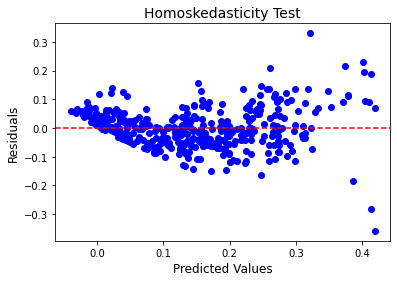

In [ ]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 12)
ax.set_ylabel('Residuals', fontsize = 12)
ax.set_title('Homoskedasticity Test', fontsize = 14)
plt.show()

In [ ]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([dataset, residuals_pooled_OLS], axis=1)
#dataset
#residuals_pooled_OLS
#pooled_OLS_dataset
#pooled_OLS_dataset = pooled_OLS_dataset.drop(['Year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(dataset[['DDD_sys_commun',
                      'per_cap_US.',	'GDP_total','GDP_._health','Out_pocket_exp','HDR',
                      'ctrl_corrup','GOV_effect','rule_law']])
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))

AssertionError: ignored

In [ ]:
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 105.7623372944989, 'LM p-val': 1.069182297404914e-18, 'F-Stat': 15.563007594626376, 'F p-val': 9.344765570818688e-22}


In [ ]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

1.0452622332509522


In [ ]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
#exog = sm.tools.tools.add_constant(dataset['income'])
#endog = dataset['violent']
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:           multi_R_perc   R-squared:                        0.2742
Estimator:              RandomEffects   R-squared (Between):              0.8128
No. Observations:                 401   R-squared (Within):               0.0435
Date:                Mon, Mar 29 2021   R-squared (Overall):              0.6591
Time:                        22:17:05   Log-likelihood                    566.90
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      16.416
Entities:                          30   P-value                           0.0000
Avg Obs:                       13.367   Distribution:                   F(9,391)
Min Obs:                       8.0000                                           
Max Obs:                       14.000   F-statistic (robust):             15.945
                            

In [ ]:
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:           multi_R_perc   R-squared:                        0.0981
Estimator:                   PanelOLS   R-squared (Between):              0.1816
No. Observations:                 401   R-squared (Within):               0.0981
Date:                Mon, Mar 29 2021   R-squared (Overall):              0.1712
Time:                        22:17:24   Log-likelihood                    594.14
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.3756
Entities:                          30   P-value                           0.0000
Avg Obs:                       13.367   Distribution:                   F(9,362)
Min Obs:                       8.0000                                           
Max Obs:                       14.000   F-statistic (robust):             4.3756
                            

In [ ]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [ ]:
def hausman(fe, re):
 b = fe.params
 B = re.params
 v_b = fe.cov
 v_B = re.cov
 df = b[np.abs(b) < 1e8].size
 chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
 pval = stats.chi2.sf(chi2, df)
 return chi2, df, pval

In [ ]:
hausman_results = hausman(fe_res, re_res) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: 34.71874062041656
degrees of freedom: 10
p-Value: 0.00013944048852665422


In [ ]:
import econtools
import econtools.metrics as mt

In [ ]:
def hausman(fe, re):
    """
    Compute hausman test for fixed effects/random effects models
    b = beta_fe
    B = beta_re
    From theory we have that b is always consistent, but B is consistent
    under the alternative hypothesis and efficient under the null.
    The test statistic is computed as
    z = (b - B)' [V_b - v_B^{-1}](b - B)
    The statistic is distributed z \sim \chi^2(k), where k is the number
    of regressors in the model.
    Parameters
    ==========
    fe : statsmodels.regression.linear_panel.PanelLMWithinResults
        The results obtained by using sm.PanelLM with the
        method='within' option.
    re : statsmodels.regression.linear_panel.PanelLMRandomResults
        The results obtained by using sm.PanelLM with the
        method='swar' option.
    Returns
    =======
    chi2 : float
        The test statistic
    df : int
        The number of degrees of freedom for the distribution of the
        test statistic
    pval : float
        The p-value associated with the null hypothesis
    Notes
    =====
    The null hypothesis supports the claim that the random effects
    estimator is "better". If we reject this hypothesis it is the same
    as saying we should be using fixed effects because there are
    systematic differences in the coefficients.
    """

    # Pull data out
    b = fe.params
    B = re.params
    v_b = fe.cov_params()
    v_B = re.cov_params()

    # NOTE: find df. fe should toss time-invariant variables, but it
    #       doesn't. It does return garbage so we use that to filter
    df = b[np.abs(b) < 1e8].size

    # compute test statistic and associated p-value
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))
    pval = stats.chi2.sf(chi2, df)

    return chi2, df, pval
